# TGP #1

## Data Preprocessing

### Import Libraries

In [ ]:
# Import Library Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings

In [ ]:
pd.set_option('display.max_columns',None)

Melakukan Import Dataset via Upload File

### Import Dataset

In [ ]:
colnames = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribe']
dm = pd.read_csv('Data utk TGP #1.csv', names=colnames, sep=';', header=None, skiprows=1)

dm

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Summary Statistics

<Figure size 1000x1000 with 0 Axes>

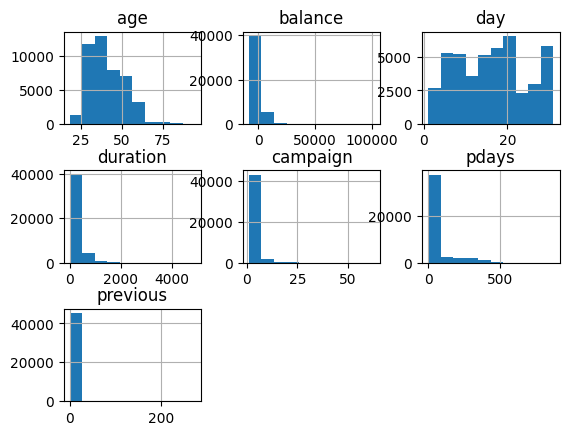

In [ ]:
# menampilkan histogram
plt.figure(figsize = (10, 10))
dm.hist()
plt.subplots_adjust(hspace=0.5)
plt.show()

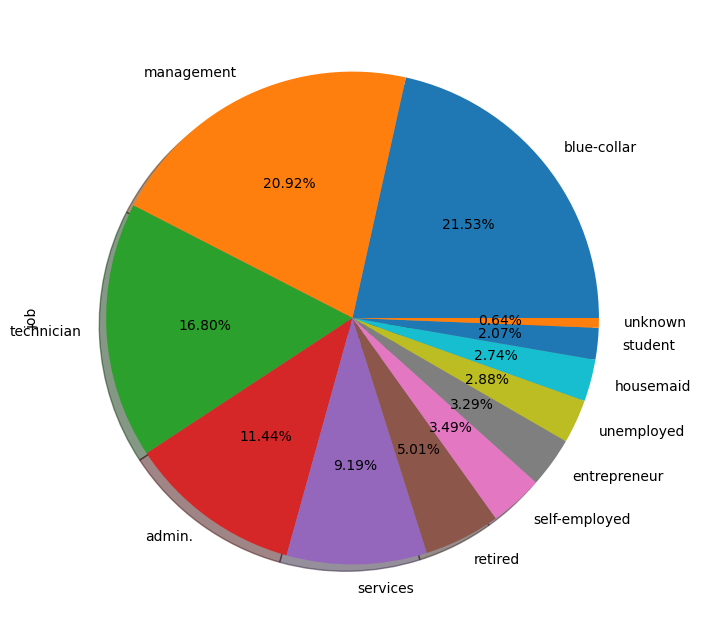

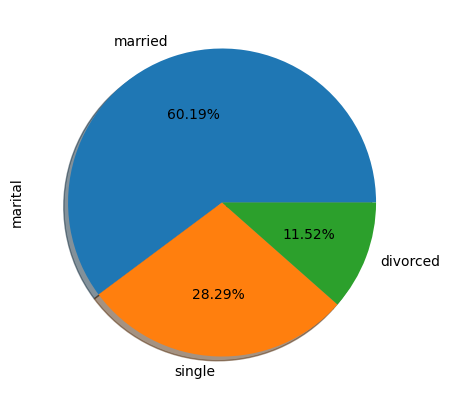

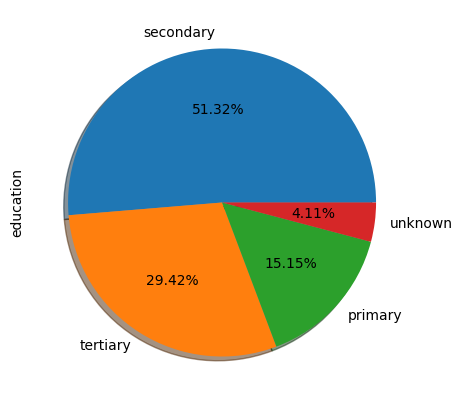

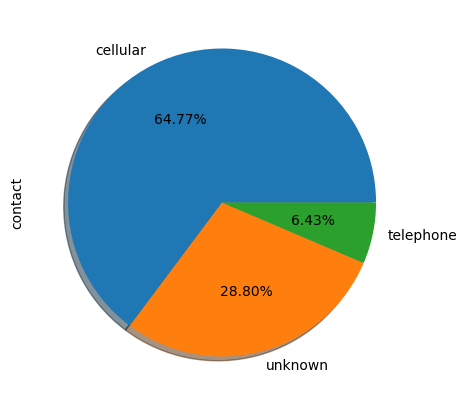

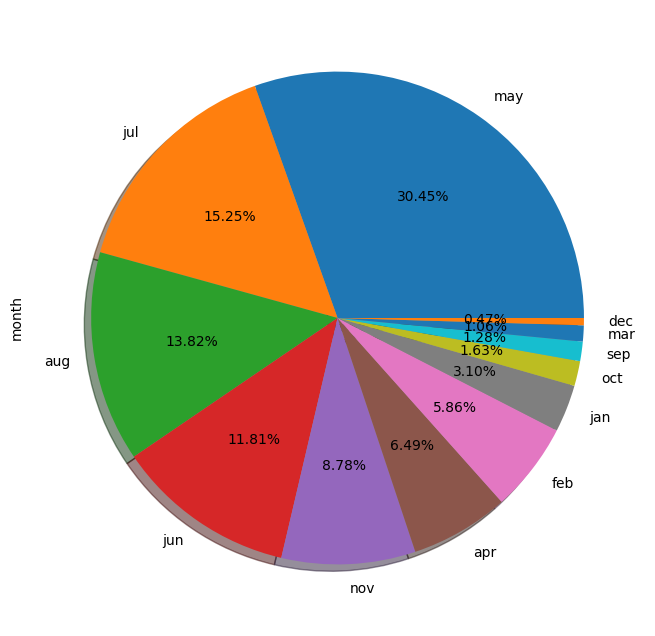

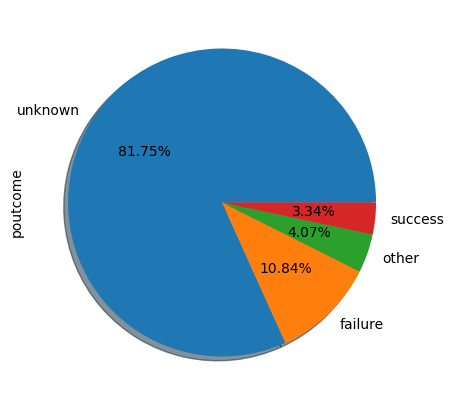

In [ ]:
dm['job'].value_counts().plot.pie(autopct='%.2f%%',shadow=True,figsize=(8,8))
plt.show()
dm['marital'].value_counts().plot.pie(autopct='%.2f%%',shadow=True,figsize=(5,5))
plt.show()
dm['education'].value_counts().plot.pie(autopct='%.2f%%',shadow=True,figsize=(5,5))
plt.show()
dm['contact'].value_counts().plot.pie(autopct='%.2f%%',shadow=True,figsize=(5,5))
plt.show()
dm['month'].value_counts().plot.pie(autopct='%.2f%%',shadow=True,figsize=(8,8))
plt.show()
dm['poutcome'].value_counts().plot.pie(autopct='%.2f%%',shadow=True,figsize=(5,5))
plt.show()

### Data Duplicate Check

In [ ]:
jumlah_baris_duplikat = dm.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


### Display Data Types

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Dalam tabel, masih terdapat beberapa kolom dengan tipe data 'object'. Oleh karena itu, diperlukan penyesuaian tipe data untuk kolom-kolom tersebut.

### Missing Values Check

In [ ]:
dm.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

Mencari nilai apa saja yang ada pada kolom dengan tipe data 'object'

In [ ]:
kategori_job = dm['job'].unique()
kategori_marital = dm['marital'].unique()
kategori_education = dm['education'].unique()
kategori_default = dm['default'].unique()
kategori_housing = dm['housing'].unique()
kategori_loan = dm['loan'].unique()
kategori_contact = dm['contact'].unique()
kategori_month = dm['month'].unique()
kategori_poutcome = dm['poutcome'].unique()
kategori_subscribe = dm['subscribe'].unique()

print('job=', kategori_job)
print('marital=', kategori_marital)
print('education=', kategori_education)
print('default=', kategori_default)
print('housing=', kategori_housing)
print('loan=', kategori_loan)
print('contact=', kategori_contact)
print('month=', kategori_month)
print('poutcome=', kategori_poutcome)
print('subscribe=', kategori_subscribe)

job= ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital= ['married' 'single' 'divorced']
education= ['tertiary' 'secondary' 'unknown' 'primary']
default= ['no' 'yes']
housing= ['yes' 'no']
loan= ['no' 'yes']
contact= ['unknown' 'cellular' 'telephone']
month= ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome= ['unknown' 'failure' 'other' 'success']
subscribe= ['no' 'yes']


Tidak ditemukan missing values tetapi pada beberapa kolom terdapat nilai 'unknown'. Nilai tersebut tetap dibiarkan saja

### Remove Outliers

Menghapus outlier pada kolom dengan data numeric

In [ ]:
cols_to_check = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
z_scores = np.abs(stats.zscore(dm[cols_to_check]))
threshold = 3
outlier_mask = (z_scores > threshold).any(axis=1)
dm_no_outlier = dm[~outlier_mask].copy()
dm_no_outlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Encoding Data Type

Label encoding data type

In [ ]:
object_column = ['job', 'marital','default', 'housing', 'loan', 'contact', 'subscribe', 'poutcome']
dm_encoded = dm_no_outlier.copy()
dm_encoded = dm_encoded.replace(
    {'month' : {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12}})
dm_encoded = dm_encoded.replace({'education' : {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0}})
dm_encoded = dm_encoded.replace({'poutcome' : {'failure': 1, 'success': 2, 'other': 3, 'unknown':0}})
dm_encoded['job'] = dm_encoded['job'].replace('unknown', 0)
for column in object_column:
    dm_encoded[column] = dm_encoded[column].astype('category')
    dm_encoded[column] = dm_encoded[column].cat.codes
dm_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40209 non-null  int64
 1   job        40209 non-null  int8 
 2   marital    40209 non-null  int8 
 3   education  40209 non-null  int64
 4   default    40209 non-null  int8 
 5   balance    40209 non-null  int64
 6   housing    40209 non-null  int8 
 7   loan       40209 non-null  int8 
 8   contact    40209 non-null  int8 
 9   day        40209 non-null  int64
 10  month      40209 non-null  int64
 11  duration   40209 non-null  int64
 12  campaign   40209 non-null  int64
 13  pdays      40209 non-null  int64
 14  previous   40209 non-null  int64
 15  poutcome   40209 non-null  int8 
 16  subscribe  40209 non-null  int8 
dtypes: int64(9), int8(8)
memory usage: 3.4 MB


## Exploratory Data Analysis

### Univariate Analysis

#### age

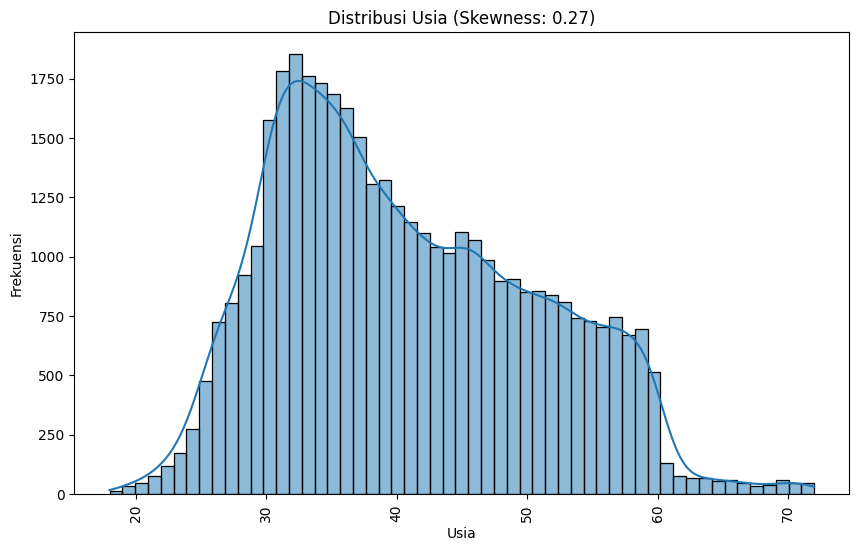

Skewness pada kolom 'usia': 0.26700234555574975


In [ ]:
skewness = stats.skew(dm_no_outlier['age'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(dm_no_outlier['age'], bins=len(dm_no_outlier['age'].unique()), kde=True)
plt.title(f'Distribusi Usia (Skewness: {skewness:.2f})')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()

print("Skewness pada kolom 'usia':", skewness)

#### job

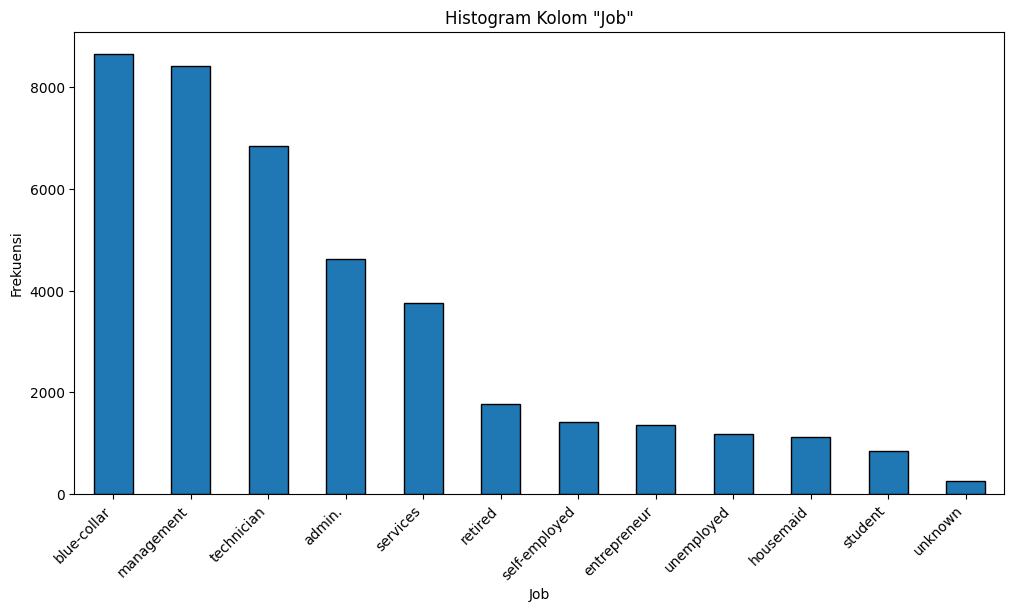

In [ ]:
plt.figure(figsize=(12, 6))
dm_no_outlier['job'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Histogram Kolom "Job"')
plt.xlabel('Job')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

#### marital

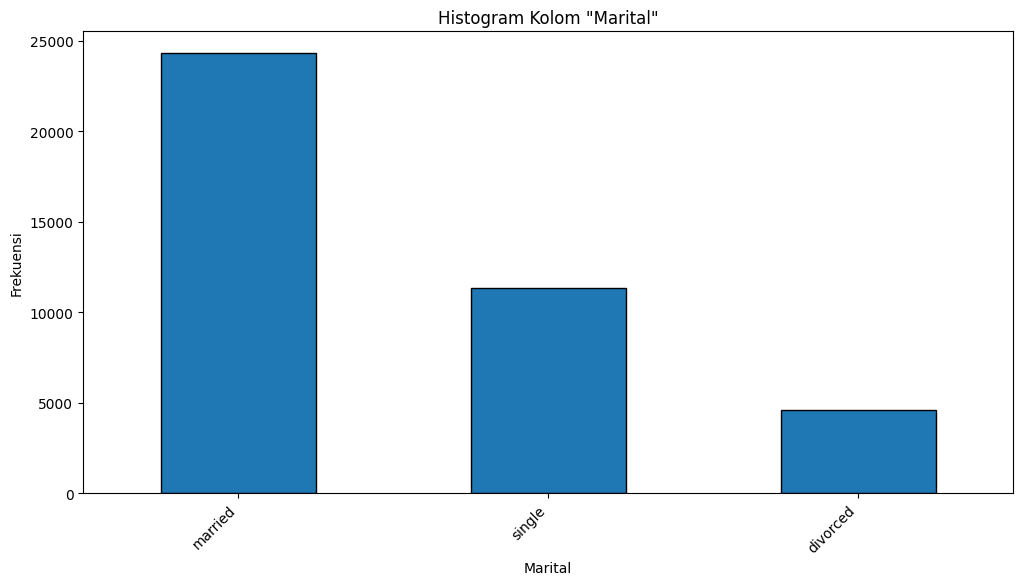

In [ ]:
plt.figure(figsize=(12, 6))
dm_no_outlier['marital'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Histogram Kolom "Marital"')
plt.xlabel('Marital')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

#### education

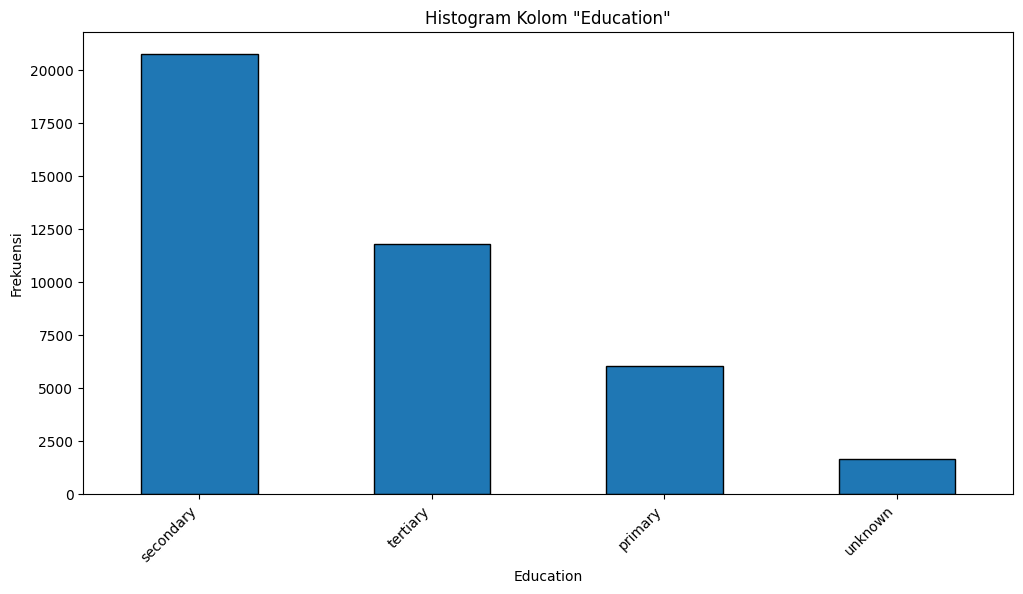

In [ ]:
plt.figure(figsize=(12, 6))
dm_no_outlier['education'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Histogram Kolom "Education"')
plt.xlabel('Education')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

#### default

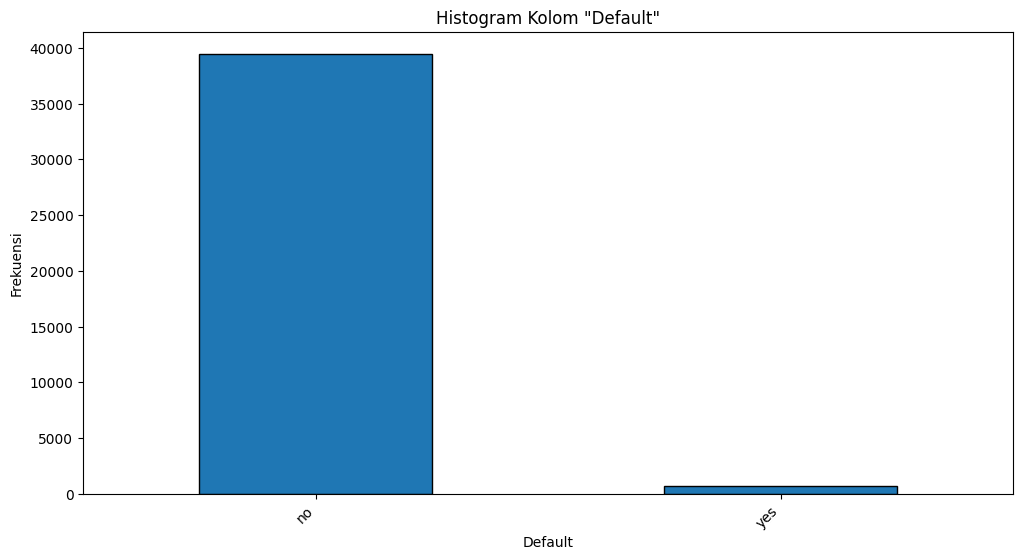

In [ ]:
plt.figure(figsize=(12, 6))
dm_no_outlier['default'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Histogram Kolom "Default"')
plt.xlabel('Default')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

#### balance

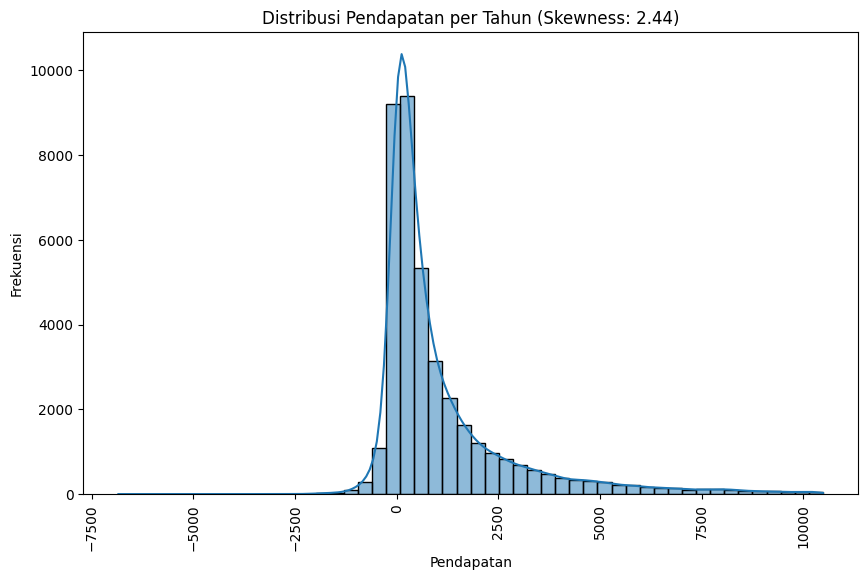

Skewness pada kolom 'balance': 2.4431570488651775


In [ ]:
skewness = stats.skew(dm_no_outlier['balance'])

plt.figure(figsize=(10, 6))
sns.histplot(dm_no_outlier['balance'], bins=50, kde=True)
plt.title(f'Distribusi Pendapatan per Tahun (Skewness: {skewness:.2f})')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()

print("Skewness pada kolom 'balance':", skewness)

#### housing

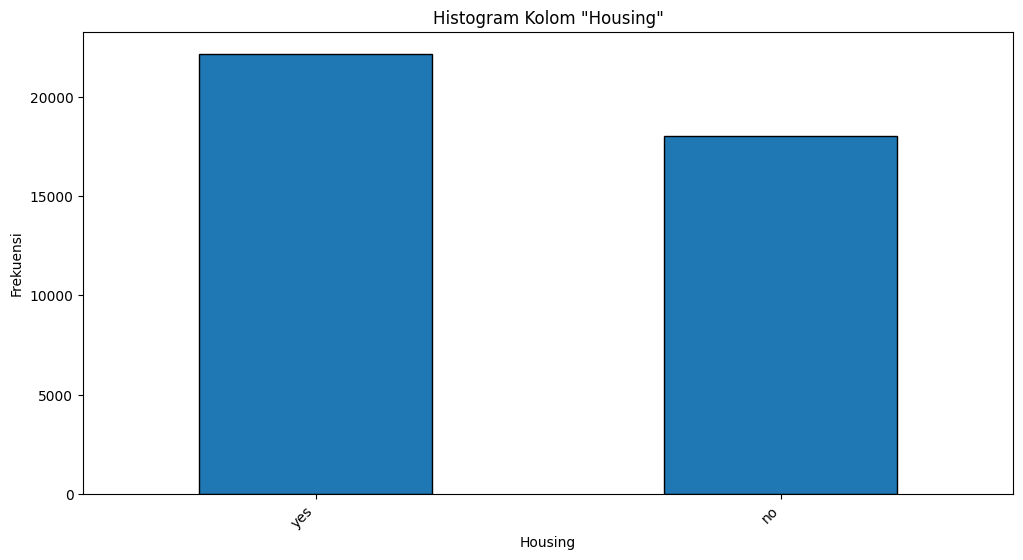

In [ ]:
plt.figure(figsize=(12, 6))
dm_no_outlier['housing'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Histogram Kolom "Housing"')
plt.xlabel('Housing')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

#### loan

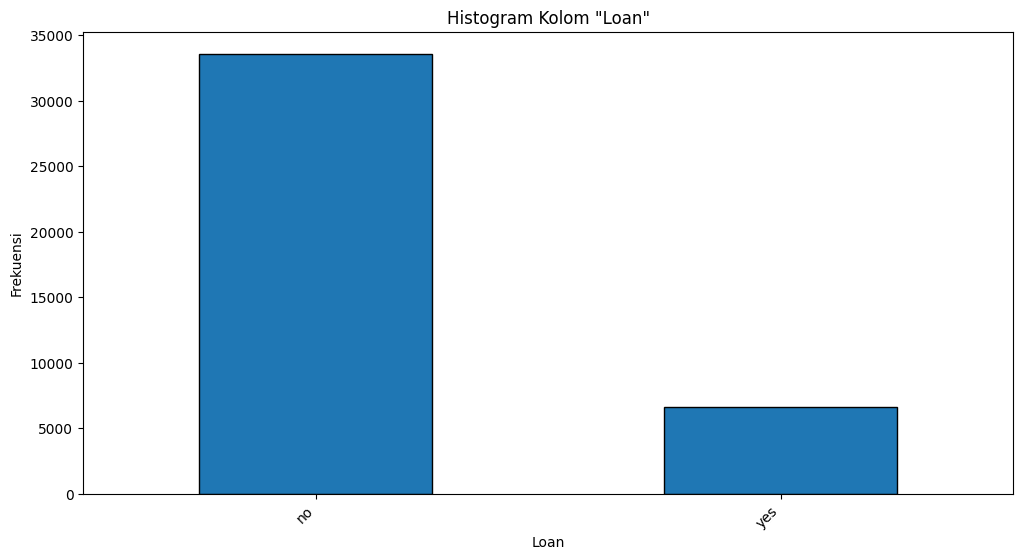

In [ ]:
plt.figure(figsize=(12, 6))
dm_no_outlier['loan'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Histogram Kolom "Loan"')
plt.xlabel('Loan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

#### contact

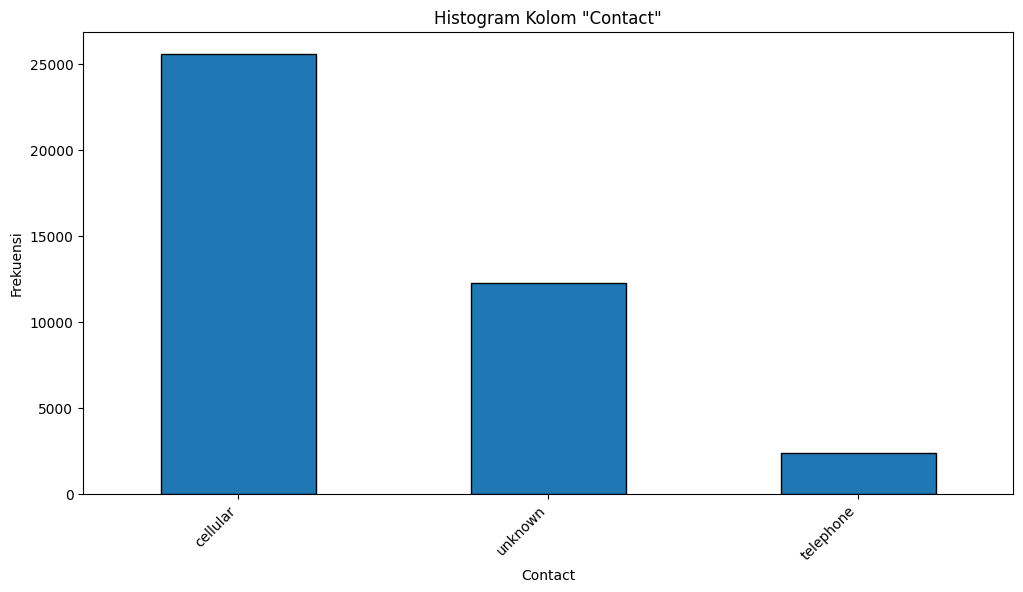

In [ ]:
plt.figure(figsize=(12, 6))
dm_no_outlier['contact'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Histogram Kolom "Contact"')
plt.xlabel('Contact')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

#### day

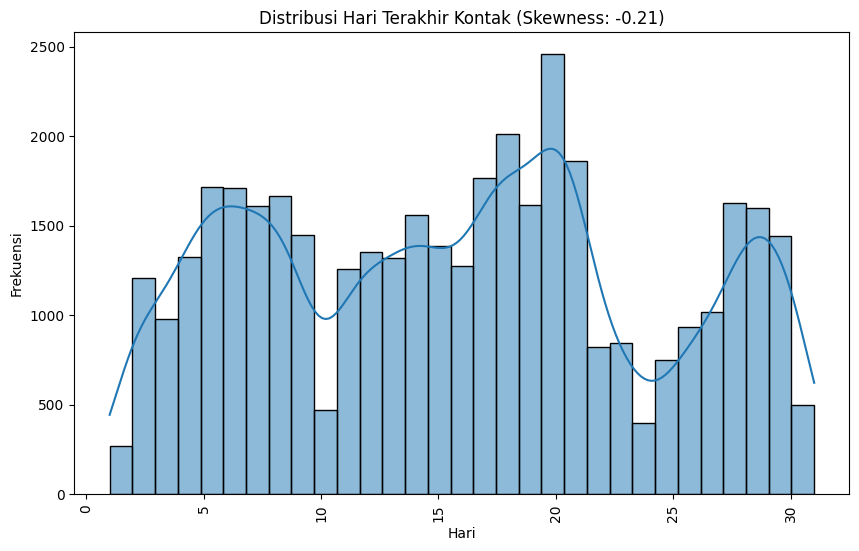

Skewness pada kolom 'day': -0.20681003825175


In [ ]:
skewness = stats.skew(dm_no_outlier['day'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(dm_no_outlier['day'], bins=len(dm_no_outlier['day'].unique()), kde=True)
plt.title(f'Distribusi Hari Terakhir Kontak (Skewness: {skewness:.2f})')
plt.xlabel('Hari')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()

print("Skewness pada kolom 'day':", skewness)

#### month

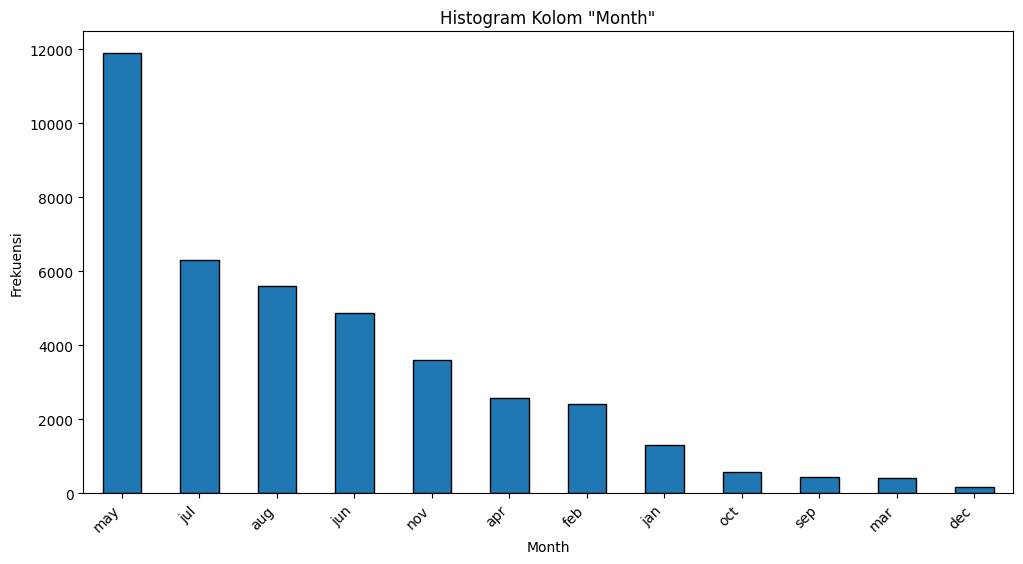

In [ ]:
plt.figure(figsize=(12, 6))
dm_no_outlier['month'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Histogram Kolom "Month"')
plt.xlabel('Month')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

#### duration

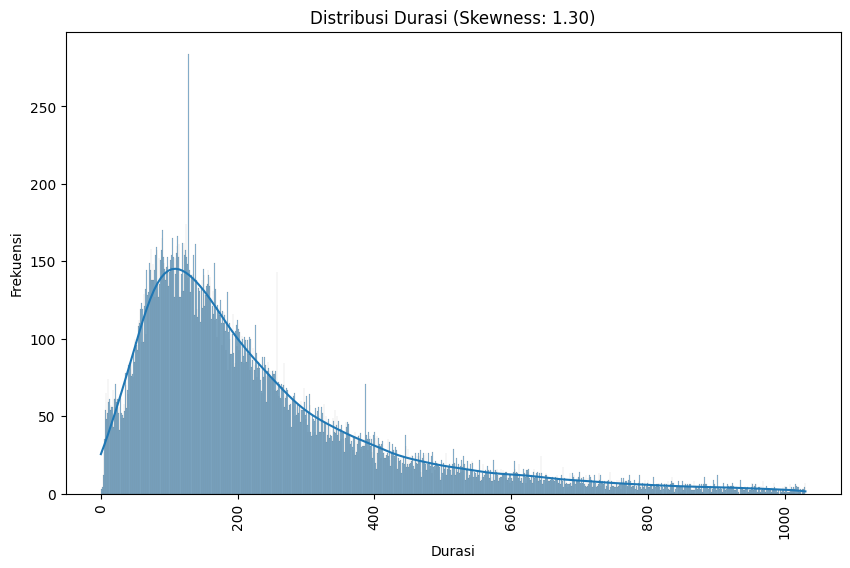

Skewness pada kolom 'duration': 1.2951486518576074


In [ ]:
skewness = stats.skew(dm_no_outlier['duration'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(dm_no_outlier['duration'], bins=len(dm_no_outlier['duration'].unique()), kde=True)
plt.title(f'Distribusi Durasi (Skewness: {skewness:.2f})')
plt.xlabel('Durasi')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()

print("Skewness pada kolom 'duration':", skewness)

#### campaign

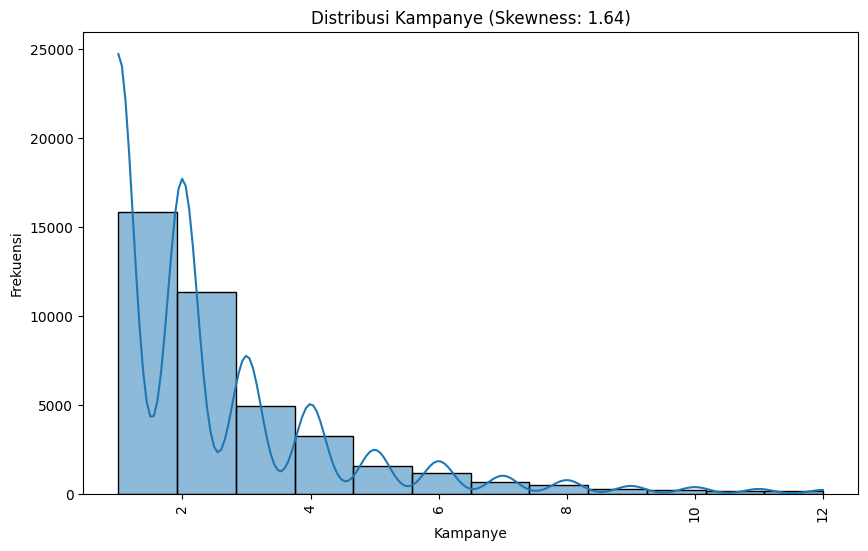

Skewness pada kolom 'usia': 1.6424448427594494


In [ ]:
skewness = stats.skew(dm_no_outlier['campaign'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(dm_no_outlier['campaign'], bins=len(dm_no_outlier['campaign'].unique()), kde=True)
plt.title(f'Distribusi Kampanye (Skewness: {skewness:.2f})')
plt.xlabel('Kampanye')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()

print("Skewness pada kolom 'usia':", skewness)

#### pdays

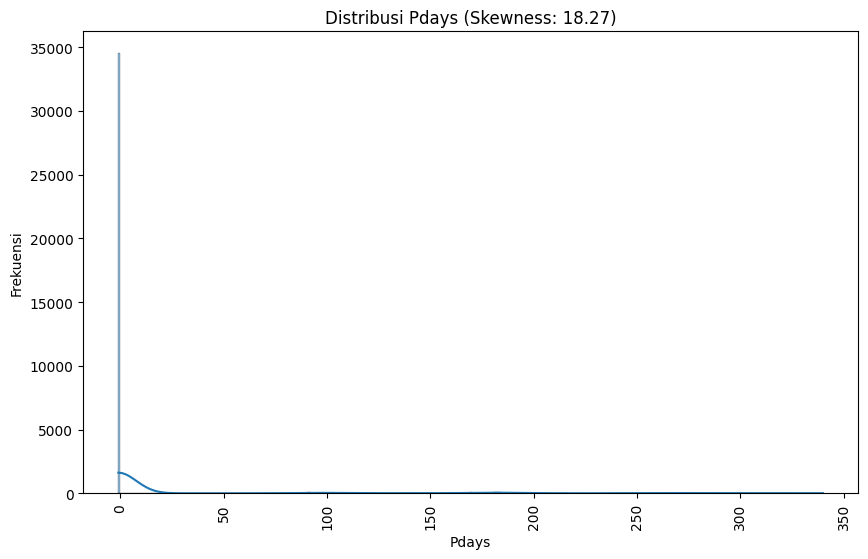

Skewness pada kolom 'pdays': 18.273340531897688


In [ ]:
skewness = stats.skew(dm_no_outlier['pdays'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(dm_no_outlier['pdays'], bins=len(dm_no_outlier['pdays'].unique()), kde=True)
plt.title(f'Distribusi Pdays (Skewness: {skewness:.2f})')
plt.xlabel('Pdays')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()

print("Skewness pada kolom 'pdays':", skewness)

#### previous

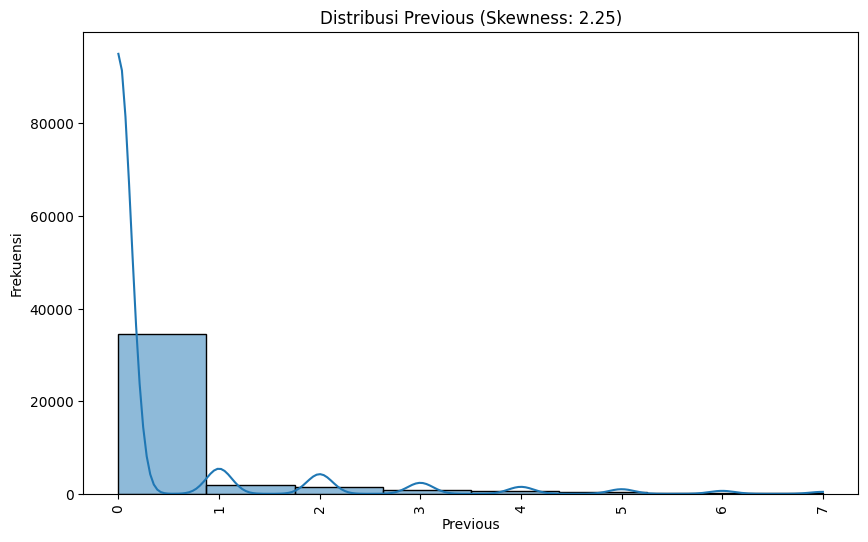

Skewness pada kolom 'previous': 2.254592295534754


In [ ]:
skewness = stats.skew(dm_no_outlier['previous'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(dm_no_outlier['previous'], bins=len(dm_no_outlier['previous'].unique()), kde=True)
plt.title(f'Distribusi Previous (Skewness: {skewness:.2f})')
plt.xlabel('Previous')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()

print("Skewness pada kolom 'previous':", skewness)

### Bivariate Analysis

<Figure size 2000x2000 with 0 Axes>

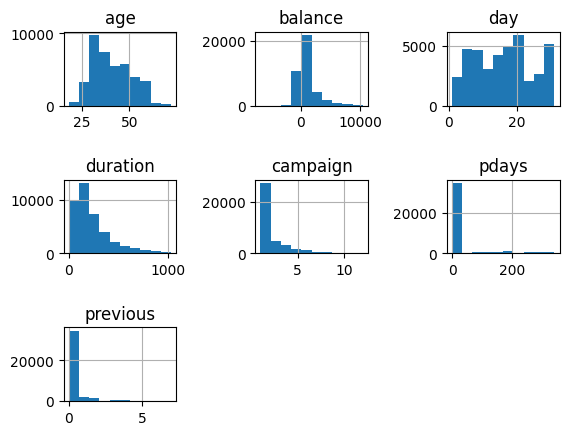

In [ ]:
plt.figure(figsize=(20, 20))
dm_no_outlier.hist(bins=10)
plt.subplots_adjust(hspace=1, wspace=0.7)
plt.show()

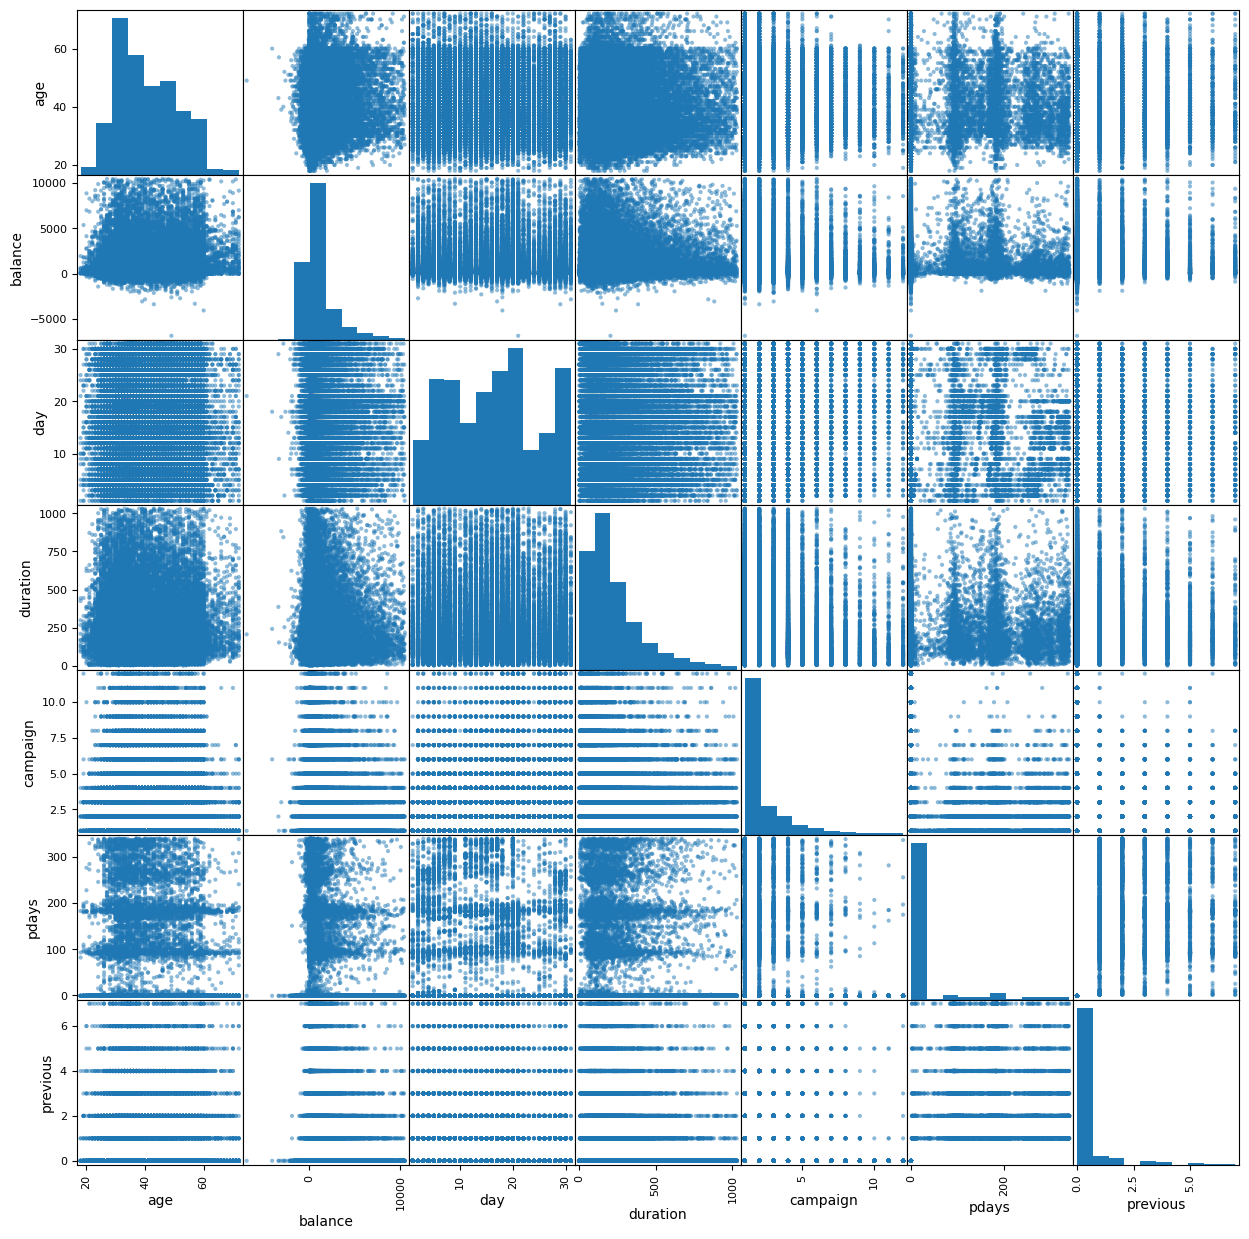

In [ ]:
# Scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dm_no_outlier, figsize = (15,15))
plt.show()

In [ ]:
#sns.pairplot(data=dm_no_outlier, hue='subscribe')

#### Analysis Each Independent Attribute with Dependent Attributes

##### age

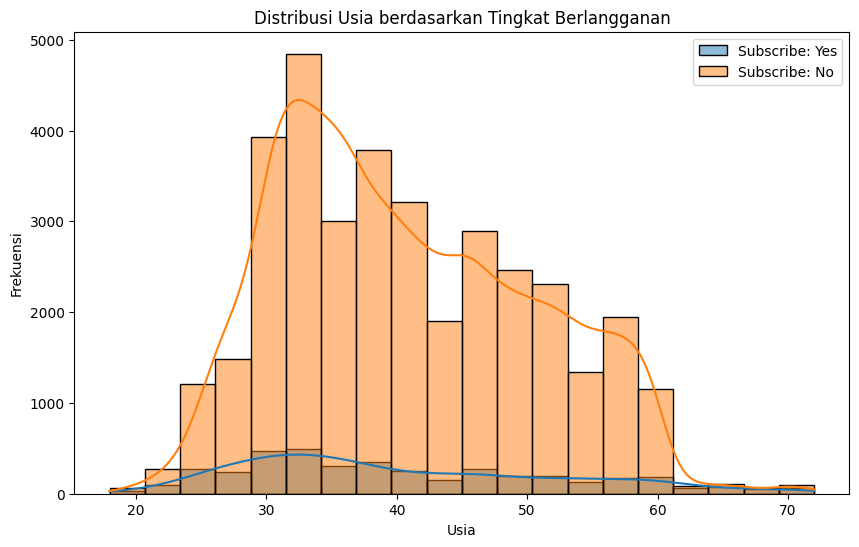

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'yes'], x='age', bins=20, kde=True, label='Subscribe: Yes')
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'no'], x='age', bins=20, kde=True, label='Subscribe: No')
plt.title('Distribusi Usia berdasarkan Tingkat Berlangganan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

##### job

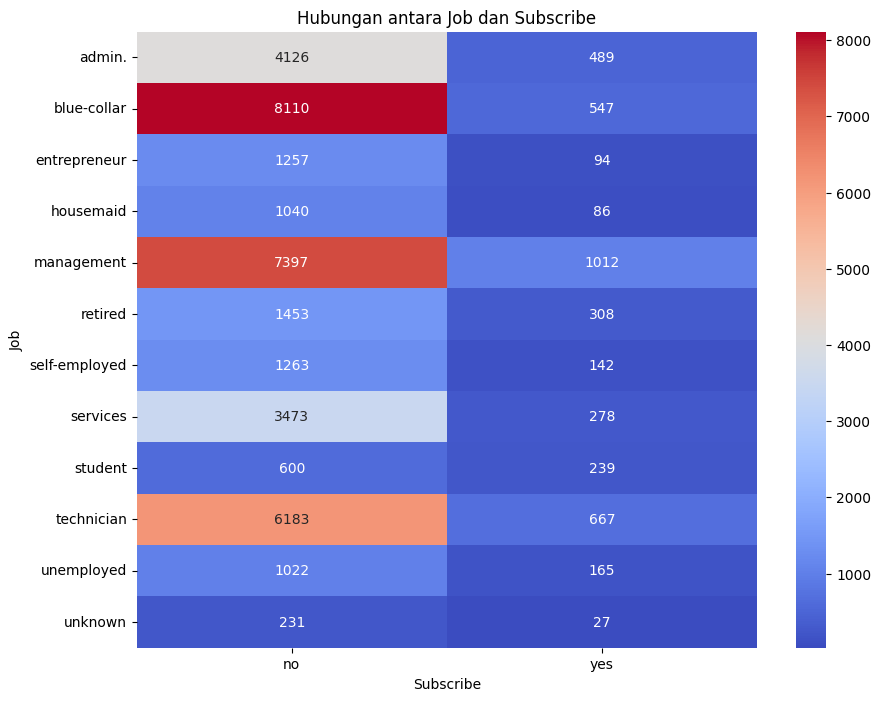

In [ ]:
contingency_table = pd.crosstab(dm_no_outlier['job'], dm_no_outlier['subscribe'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Hubungan antara Job dan Subscribe')
plt.xlabel('Subscribe')
plt.ylabel('Job')
plt.show()

##### marital

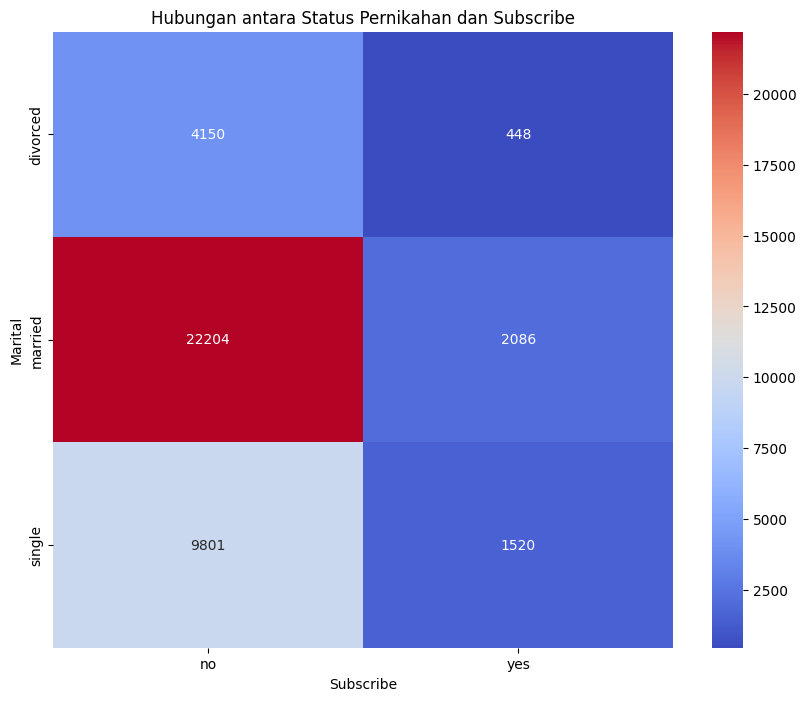

In [ ]:
contingency_table = pd.crosstab(dm_no_outlier['marital'], dm_no_outlier['subscribe'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Hubungan antara Status Pernikahan dan Subscribe')
plt.xlabel('Subscribe')
plt.ylabel('Marital')
plt.show()

##### education

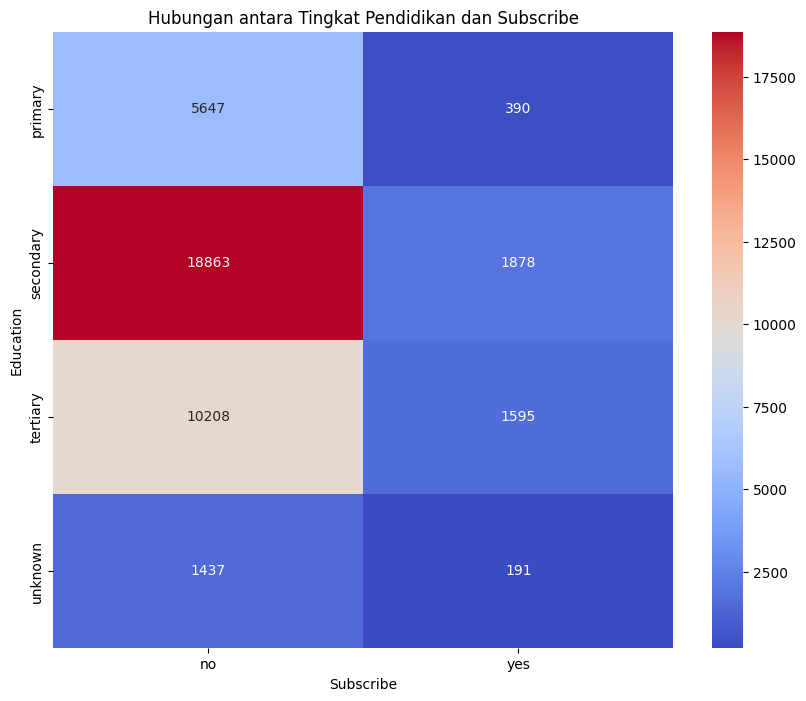

In [ ]:
contingency_table = pd.crosstab(dm_no_outlier['education'], dm_no_outlier['subscribe'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Hubungan antara Tingkat Pendidikan dan Subscribe')
plt.xlabel('Subscribe')
plt.ylabel('Education')
plt.show()

##### default

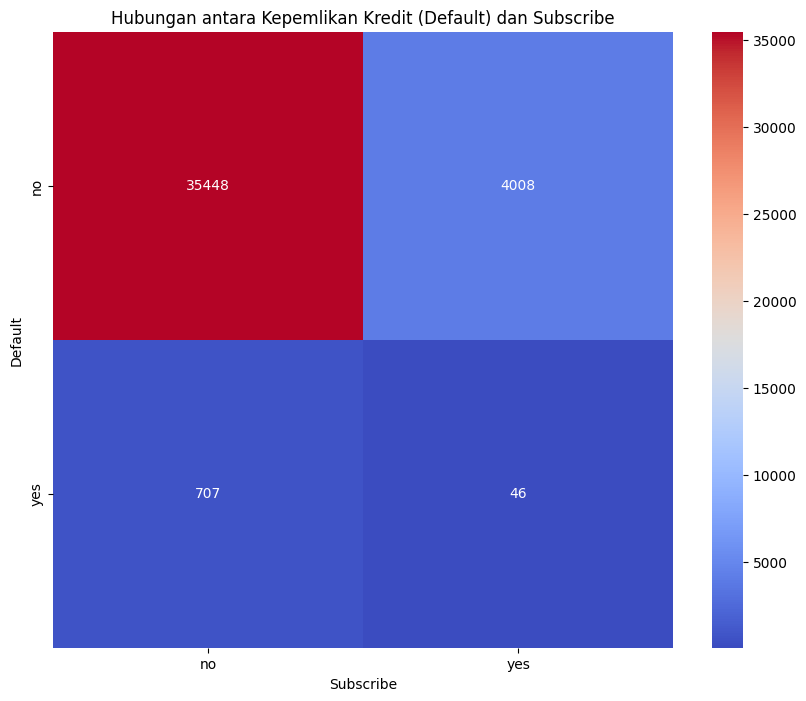

In [ ]:
contingency_table = pd.crosstab(dm_no_outlier['default'], dm_no_outlier['subscribe'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Hubungan antara Kepemlikan Kredit (Default) dan Subscribe')
plt.xlabel('Subscribe')
plt.ylabel('Default')
plt.show()

##### balance

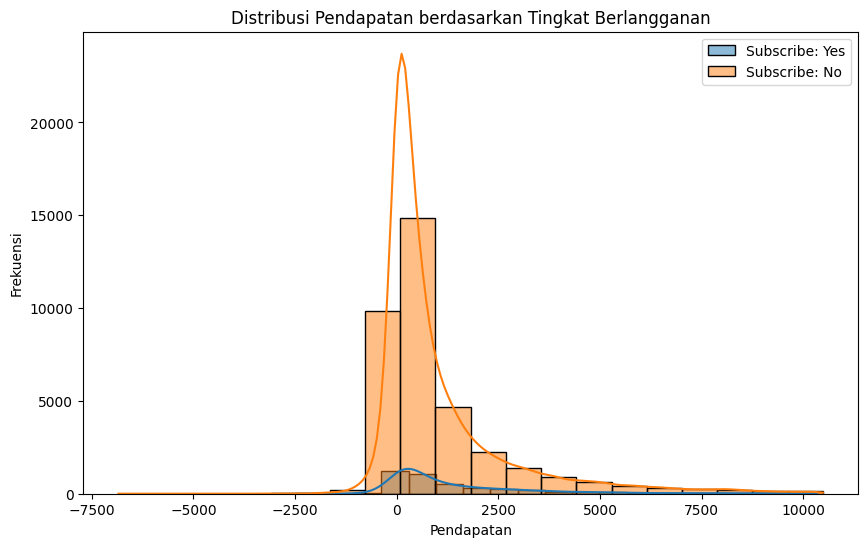

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'yes'], x='balance', bins=20, kde=True, label='Subscribe: Yes')
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'no'], x='balance', bins=20, kde=True, label='Subscribe: No')
plt.title('Distribusi Pendapatan berdasarkan Tingkat Berlangganan')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

##### housing

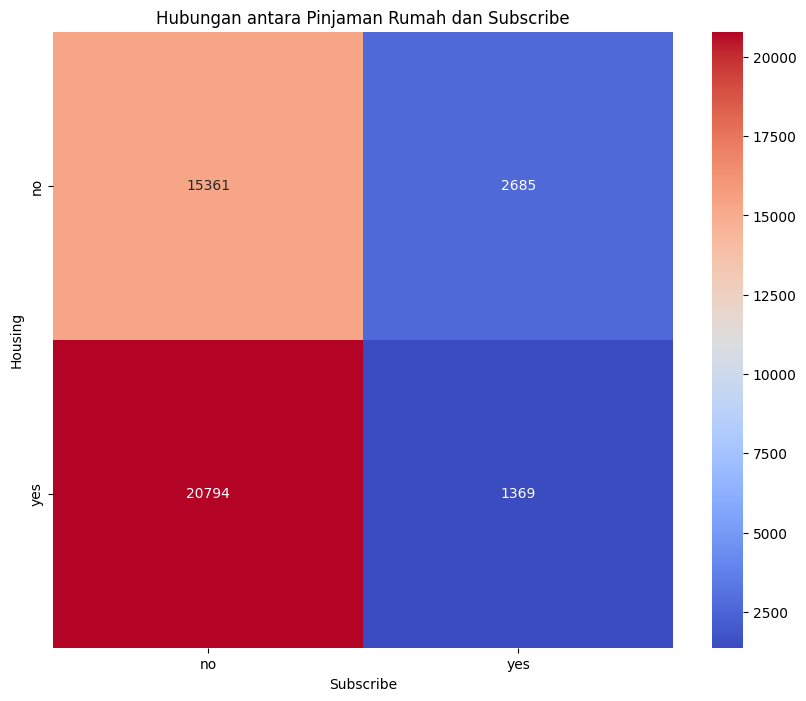

In [ ]:
contingency_table = pd.crosstab(dm_no_outlier['housing'], dm_no_outlier['subscribe'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Hubungan antara Pinjaman Rumah dan Subscribe')
plt.xlabel('Subscribe')
plt.ylabel('Housing')
plt.show()

##### loan

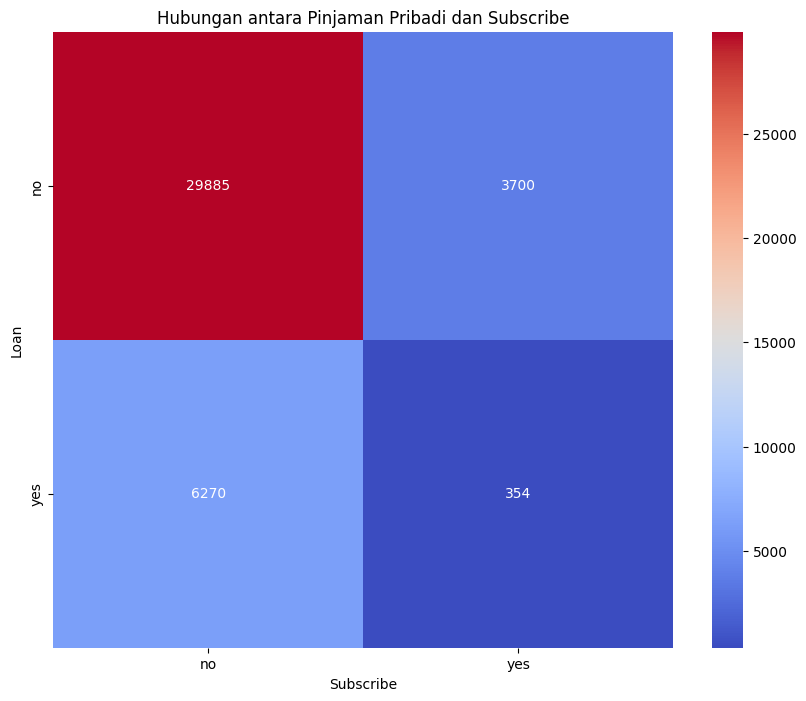

In [ ]:
contingency_table = pd.crosstab(dm_no_outlier['loan'], dm_no_outlier['subscribe'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Hubungan antara Pinjaman Pribadi dan Subscribe')
plt.xlabel('Subscribe')
plt.ylabel('Loan')
plt.show()

##### contact

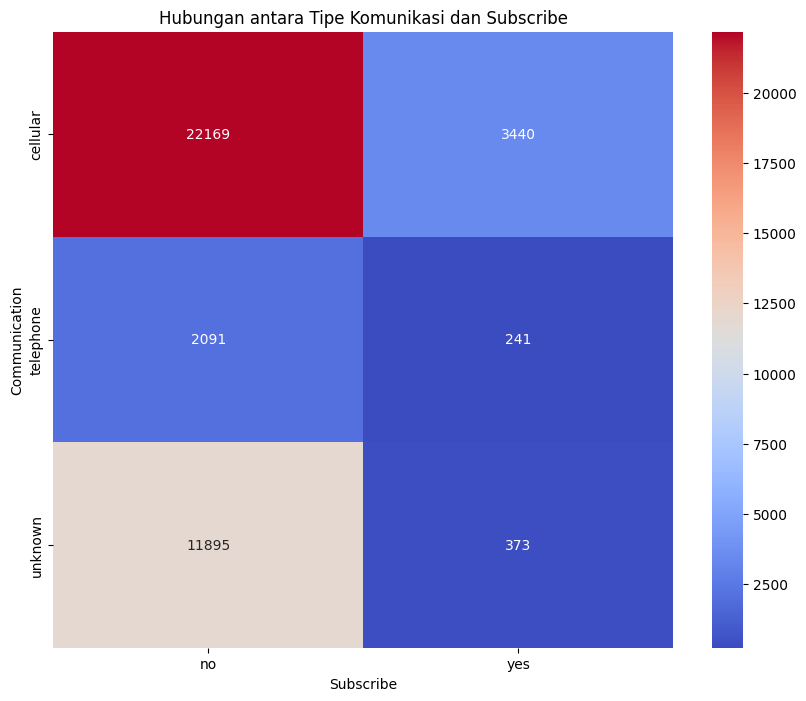

In [ ]:
contingency_table = pd.crosstab(dm_no_outlier['contact'], dm_no_outlier['subscribe'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Hubungan antara Tipe Komunikasi dan Subscribe')
plt.xlabel('Subscribe')
plt.ylabel('Communication')
plt.show()

##### day

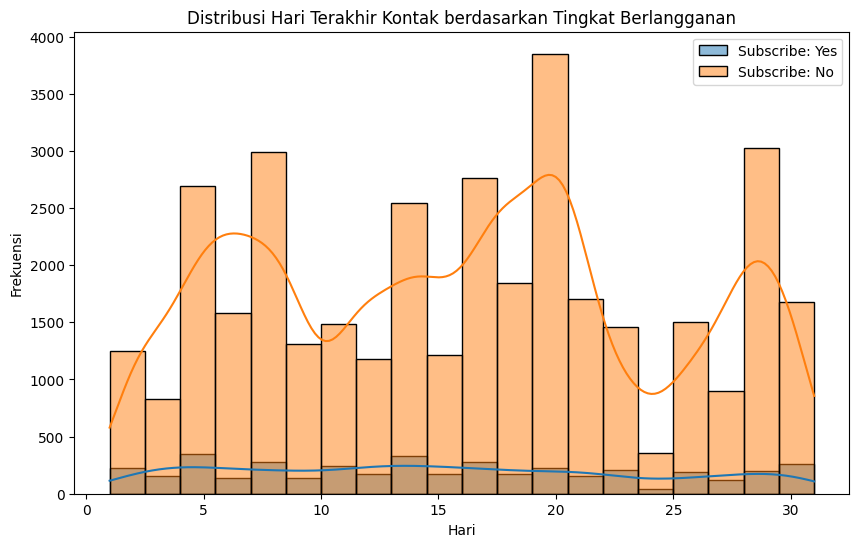

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'yes'], x='day', bins=20, kde=True, label='Subscribe: Yes')
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'no'], x='day', bins=20, kde=True, label='Subscribe: No')
plt.title('Distribusi Hari Terakhir Kontak berdasarkan Tingkat Berlangganan')
plt.xlabel('Hari')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

##### month

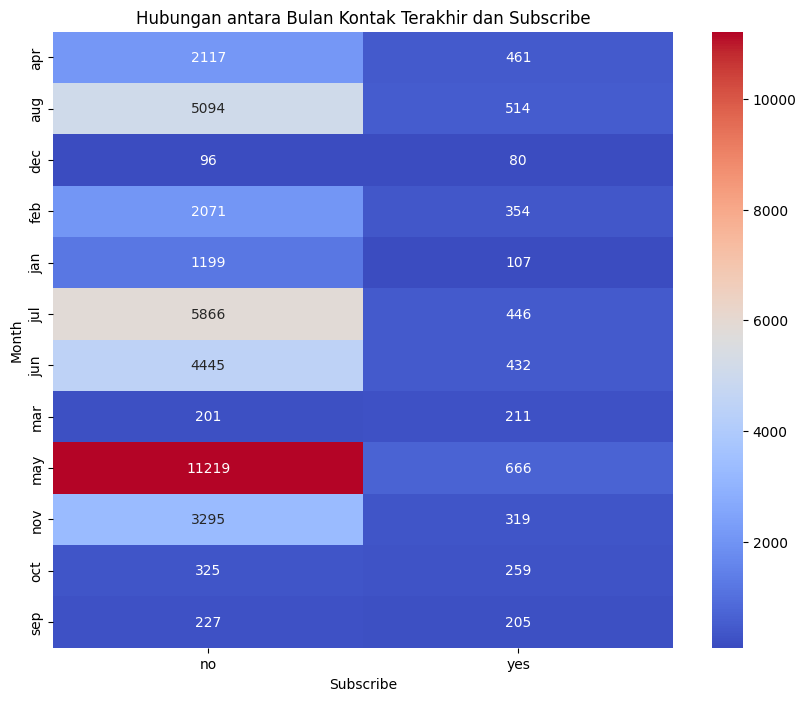

In [ ]:
contingency_table = pd.crosstab(dm_no_outlier['month'], dm_no_outlier['subscribe'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Hubungan antara Bulan Kontak Terakhir dan Subscribe')
plt.xlabel('Subscribe')
plt.ylabel('Month')
plt.show()

##### duration

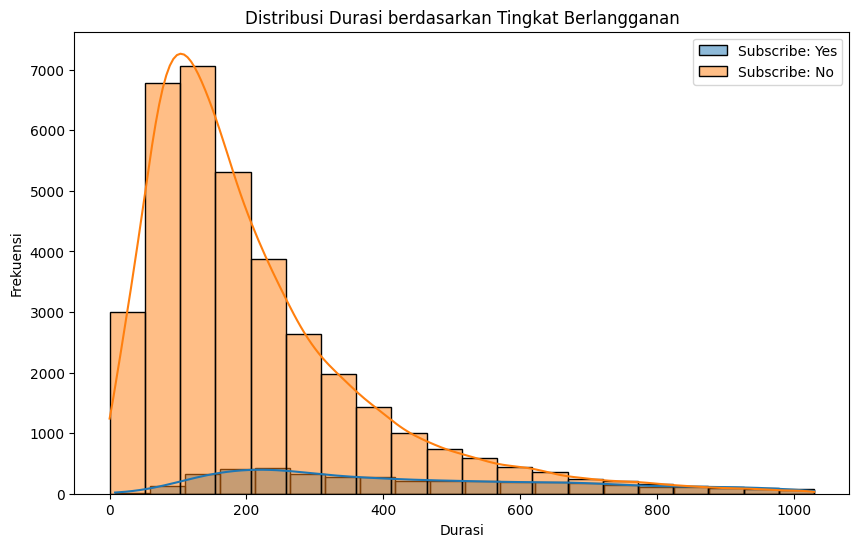

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'yes'], x='duration', bins=20, kde=True, label='Subscribe: Yes')
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'no'], x='duration', bins=20, kde=True, label='Subscribe: No')
plt.title('Distribusi Durasi berdasarkan Tingkat Berlangganan')
plt.xlabel('Durasi')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

##### campaign

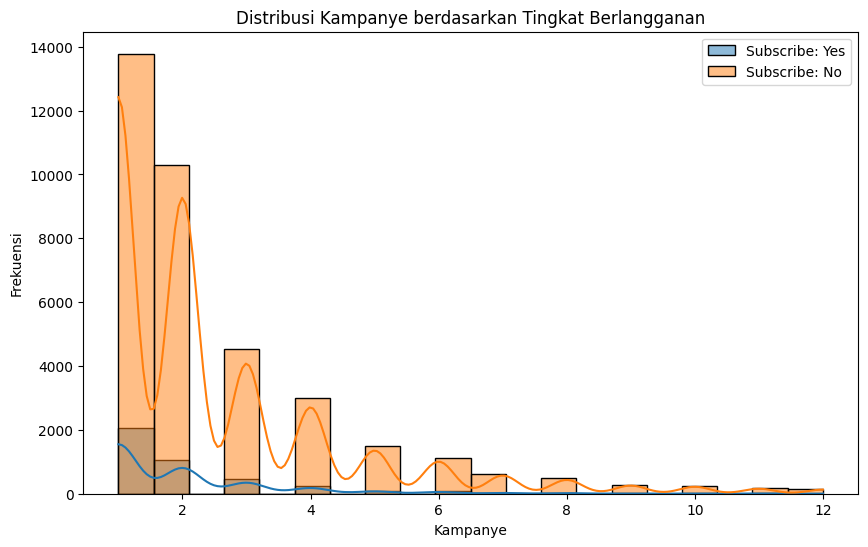

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'yes'], x='campaign', bins=20, kde=True, label='Subscribe: Yes')
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'no'], x='campaign', bins=20, kde=True, label='Subscribe: No')
plt.title('Distribusi Kampanye berdasarkan Tingkat Berlangganan')
plt.xlabel('Kampanye')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

##### pdays

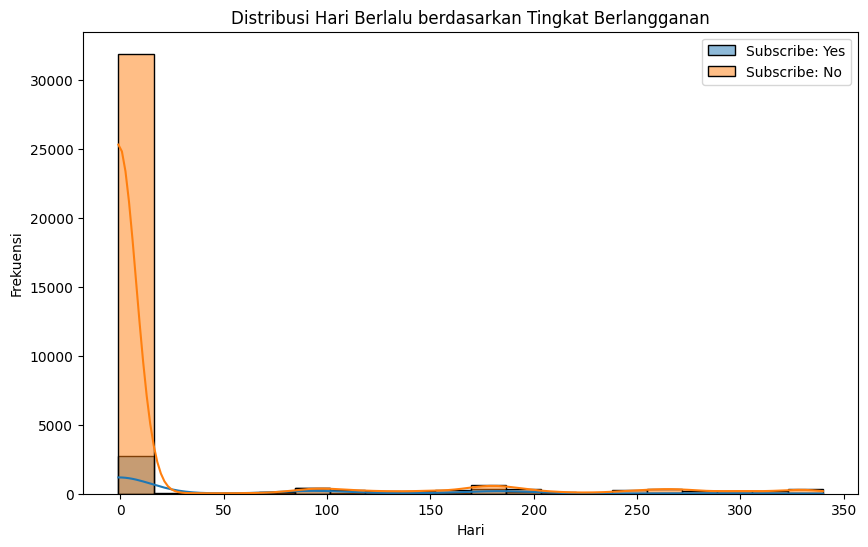

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'yes'], x='pdays', bins=20, kde=True, label='Subscribe: Yes')
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'no'], x='pdays', bins=20, kde=True, label='Subscribe: No')
plt.title('Distribusi Hari Berlalu berdasarkan Tingkat Berlangganan')
plt.xlabel('Hari')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

##### previous

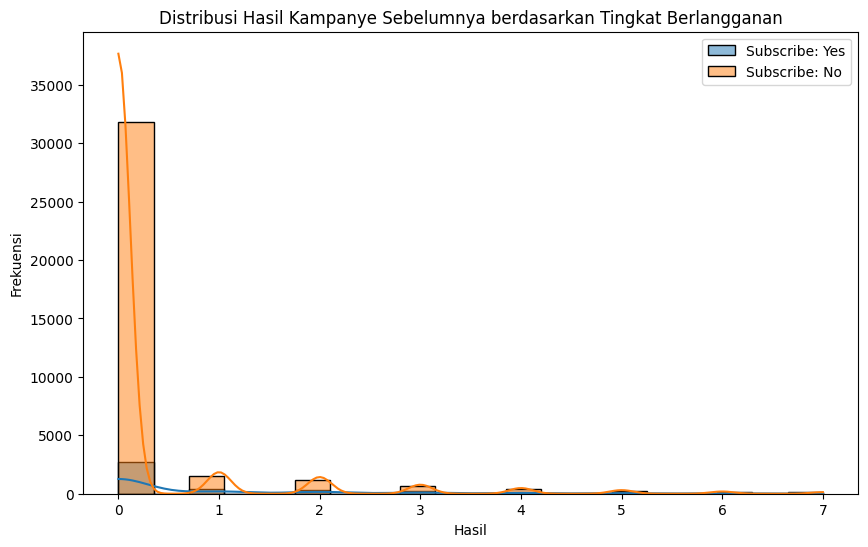

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'yes'], x='previous', bins=20, kde=True, label='Subscribe: Yes')
sns.histplot(data=dm_no_outlier[dm_no_outlier['subscribe'] == 'no'], x='previous', bins=20, kde=True, label='Subscribe: No')
plt.title('Distribusi Hasil Kampanye Sebelumnya berdasarkan Tingkat Berlangganan')
plt.xlabel('Hasil')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

#### Analysis Between Pairs of Independent Attribute

Jumlah kontak yang berbeda dan durasi panggilan yang berbeda dapat menghasilkan variasi dalam tingkat berlangganan. Ini dapat menjadi sampling subjek analisis untuk menilai bagaimana variasi ini memengaruhi tingkat berlangganan.

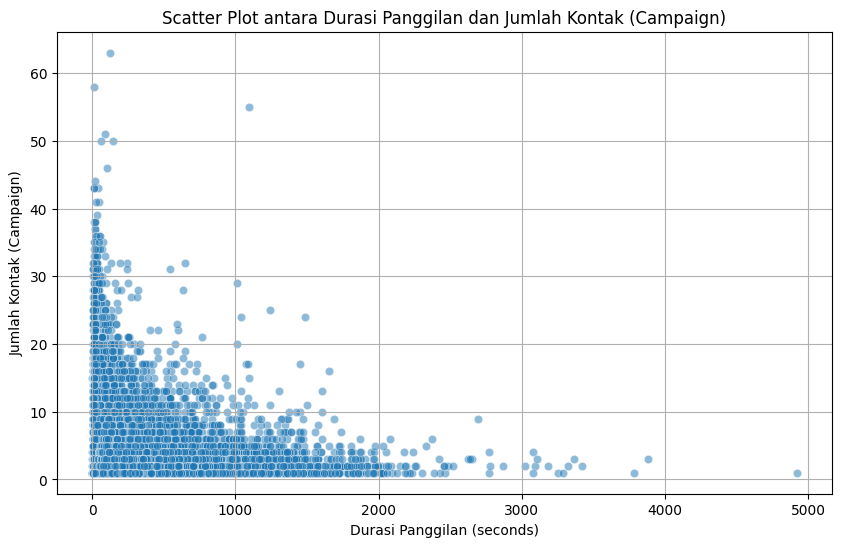

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dm, x='duration', y='campaign', alpha=0.5)
plt.title('Scatter Plot antara Durasi Panggilan dan Jumlah Kontak (Campaign)')
plt.xlabel('Durasi Panggilan (seconds)')
plt.ylabel('Jumlah Kontak (Campaign)')
plt.grid(True)
plt.show()

Dalam scatter plot tersebut, tampilan terlihat cenderung menurun sepanjang sumbu y, maka ini bisa berarti bahwa semakin lama durasi panggilan, semakin sedikit jumlah kontak kampanye yang dilakukan. Dalam konteks kampanye pemasaran, ini bisa diartikan bahwa pelanggan cenderung kurang responsif terhadap kampanye yang berlarut-larut dalam durasi panggilannya

#### Analysis Between Pairs of Independent Attribute with Dependent Attributes

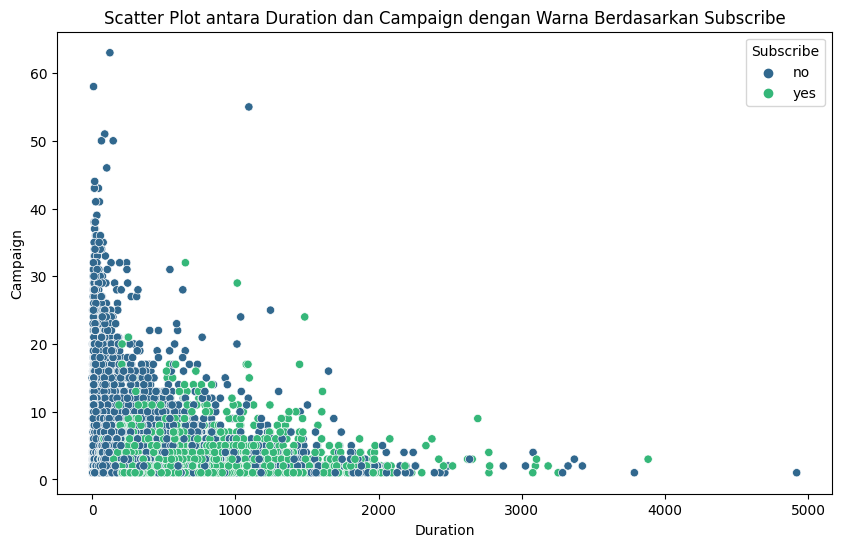

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dm, x='duration', y='campaign', hue='subscribe', palette='viridis')
plt.title('Scatter Plot antara Duration dan Campaign dengan Warna Berdasarkan Subscribe')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.legend(title='Subscribe', loc='upper right')
plt.show()

Pola titik-titik semakin ke kanan semakin turun, hal ini mengindikasikan adanya hubungan negatif antara durasi panggilan dan jumlah kontak kampanye dengan tingkat berlangganan ("subscribe")

#### Calculating Correlation Values Based On Dependent Attributes

In [ ]:
correlation = dm_encoded.corr()
correlation_dependent = correlation['subscribe'].sort_values(ascending=False)
print(correlation_dependent)

subscribe    1.000000
duration     0.362344
poutcome     0.199770
previous     0.167595
pdays        0.113905
balance      0.067409
education    0.060687
marital      0.053673
job          0.040189
month        0.015210
age         -0.008570
default     -0.018231
day         -0.029741
loan        -0.069886
campaign    -0.078197
housing     -0.143741
contact     -0.155936
Name: subscribe, dtype: float64


In [ ]:
dm_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40209 non-null  int64
 1   job        40209 non-null  int8 
 2   marital    40209 non-null  int8 
 3   education  40209 non-null  int64
 4   default    40209 non-null  int8 
 5   balance    40209 non-null  int64
 6   housing    40209 non-null  int8 
 7   loan       40209 non-null  int8 
 8   contact    40209 non-null  int8 
 9   day        40209 non-null  int64
 10  month      40209 non-null  int64
 11  duration   40209 non-null  int64
 12  campaign   40209 non-null  int64
 13  pdays      40209 non-null  int64
 14  previous   40209 non-null  int64
 15  poutcome   40209 non-null  int8 
 16  subscribe  40209 non-null  int8 
dtypes: int64(9), int8(8)
memory usage: 3.4 MB


# TGP #2

## Data Preparation

### Data Loading & Preprocessing

Praproses data telah dilakukan dan diperbaiki pada TGP#1 sehingga dapat menggunakan salinan DataFrame dari praproses data pada TGP#1

In [ ]:
tgp2 = dm_encoded.copy()

In [ ]:
tgp2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,5,1,3,0,2143,1,0,2,5,5,261,1,-1,0,0,0
1,44,10,2,2,0,29,1,0,2,5,5,151,1,-1,0,0,0
2,33,3,1,2,0,2,1,1,2,5,5,76,1,-1,0,0,0
3,47,2,1,0,0,1506,1,0,2,5,5,92,1,-1,0,0,0
4,33,0,2,0,0,1,0,0,2,5,5,198,1,-1,0,0,0


In [ ]:
tgp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40209 non-null  int64
 1   job        40209 non-null  int8 
 2   marital    40209 non-null  int8 
 3   education  40209 non-null  int64
 4   default    40209 non-null  int8 
 5   balance    40209 non-null  int64
 6   housing    40209 non-null  int8 
 7   loan       40209 non-null  int8 
 8   contact    40209 non-null  int8 
 9   day        40209 non-null  int64
 10  month      40209 non-null  int64
 11  duration   40209 non-null  int64
 12  campaign   40209 non-null  int64
 13  pdays      40209 non-null  int64
 14  previous   40209 non-null  int64
 15  poutcome   40209 non-null  int8 
 16  subscribe  40209 non-null  int8 
dtypes: int64(9), int8(8)
memory usage: 3.4 MB


### Data Balancing

In [ ]:
tgp2['subscribe'].value_counts()

0    36155
1     4054
Name: subscribe, dtype: int64

In [ ]:
X = tgp2.drop('subscribe', axis=1)
y = tgp2['subscribe']

In [ ]:
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

0    36155
1    36155
Name: subscribe, dtype: int64

### Data Splitting

In [ ]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=123, stratify=y_balanced)

### Feature Scaling

In [ ]:
X_balanced.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000
mean,40.599087,5.455552,1.210649,2.123800,0.015268,1240.617785,0.456521,0.130743,0.478191,15.509943,6.192601,326.945623,2.264638,36.182713,0.585991,0.397760
std,11.066365,3.252073,0.623535,0.791152,0.122616,1802.248152,0.498109,0.337121,0.817911,8.485626,2.603417,241.958832,1.790852,78.038826,1.343477,0.811754
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,2.000000,1.000000,2.000000,0.000000,119.000000,0.000000,0.000000,0.000000,8.000000,5.000000,142.000000,1.000000,-1.000000,0.000000,0.000000
50%,38.000000,5.000000,1.000000,2.000000,0.000000,535.000000,0.000000,0.000000,0.000000,15.000000,6.000000,251.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,8.000000,2.000000,3.000000,0.000000,1633.000000,1.000000,0.000000,1.000000,22.000000,8.000000,462.000000,3.000000,-1.000000,0.000000,0.000000
max,72.000000,11.000000,2.000000,3.000000,1.000000,10483.000000,1.000000,1.000000,2.000000,31.000000,12.000000,1030.000000,12.000000,340.000000,7.000000,3.000000


Metode yang kami pilih adalah Standard Scaling. Feature scaling hanya dilakukan pada data numeric dengan rentang nilai kontinu yang memiliki nilai standar deviasi jauh dari 1 sehingga berdasarkan data di atas, variabel yang akan di-scalling adalah age, balance, duration, dan pdays

Variabel job dan day juga memiliki nilai standar deviasi yang jauh dari 1. Akan tetapi, job termasuk ke dalam tipe data categorical. Sementara itu, variabel day tidak perlu dilakukan scaling karena nilainya merupakan representasi dari hari dalam sebulan (dari 1 hingga 31 atau tergantung pada jumlah hari dalam bulan tersebut). Meskipun ini adalah data numerik, ini sebenarnya adalah data kategorikal yang terbatas dengan nilai-nilai tertentu yang menggambarkan hari-hari dalam sebulan.

In [ ]:
scaler = StandardScaler()

X_train['age'] = scaler.fit_transform(X_train[['age']])
X_test['age'] = scaler.transform(X_test[['age']])

X_train['balance'] = scaler.fit_transform(X_train[['balance']])
X_test['balance'] = scaler.transform(X_test[['balance']])

X_train['duration'] = scaler.fit_transform(X_train[['duration']])
X_test['duration'] = scaler.transform(X_test[['duration']])

X_train['pdays'] = scaler.fit_transform(X_train[['pdays']])
X_test['pdays'] = scaler.transform(X_test[['pdays']])

X_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,5.061700e+04,50617.000000,50617.000000,50617.000000,50617.000000,5.061700e+04,50617.000000,50617.000000,50617.000000,50617.000000,50617.000000,5.061700e+04,50617.000000,5.061700e+04,50617.000000,50617.000000
mean,2.716281e-17,5.463125,1.209357,2.123061,0.015667,2.723300e-17,0.456309,0.130272,0.477666,15.510658,6.191694,9.552607e-17,2.268665,-6.931080e-18,0.583421,0.398898
std,1.000010e+00,3.252443,0.624282,0.790238,0.124183,1.000010e+00,0.498092,0.336606,0.817428,8.472693,2.608477,1.000010e+00,1.799306,1.000010e+00,1.334355,0.812383
min,-2.046882e+00,0.000000,0.000000,0.000000,0.000000,-4.468660e+00,0.000000,0.000000,0.000000,1.000000,1.000000,-1.354467e+00,1.000000,-4.777445e-01,0.000000,0.000000
25%,-7.802227e-01,2.000000,1.000000,2.000000,0.000000,-6.229398e-01,0.000000,0.000000,0.000000,8.000000,5.000000,-7.678898e-01,1.000000,-4.777445e-01,0.000000,0.000000
50%,-2.373688e-01,5.000000,1.000000,2.000000,0.000000,-3.938964e-01,0.000000,0.000000,0.000000,15.000000,6.000000,-3.134991e-01,2.000000,-4.777445e-01,0.000000,0.000000
75%,7.578634e-01,8.000000,2.000000,3.000000,0.000000,2.187255e-01,1.000000,0.000000,1.000000,21.000000,8.000000,5.663666e-01,3.000000,-4.777445e-01,0.000000,0.000000
max,2.838804e+00,11.000000,2.000000,3.000000,1.000000,5.095969e+00,1.000000,1.000000,2.000000,31.000000,12.000000,2.900283e+00,12.000000,3.887042e+00,7.000000,3.000000


## Model Classification



In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_features = ['default', 'housing', 'loan']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'))
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features), (binary_transformer, binary_features))

Pada dataset dengan jumlah entri seperti 28289, K-Fold Cross Validation lebih cocok karena memberikan estimasi yang lebih stabil dari kinerja model

In [ ]:
model_selection_scores = dict()
model_selection_scores["Metode"] = []
model_selection_scores["F1-Score Test"] = []
model_selection_scores["ROC-AUC Score Test"] = []

### Decision Tree

Langkah pertama, lakukan pencarian Parameter terbaik.

Dalam metode DecisionTreeClassifier terdapat beberapa parameter :

*   criterion
*   splitter
*   max_depth
*   min_samples_split
*   min_samples_leaf
*   max_features
*   random_state
*   class_weight
*   min_impurity_decrease
*   min_weight_fraction_leaf

Namun, karena keterbatasan runtime apabila memilih terlalu banyak parameter yang akan digunakan dalam pencarian parameter terbaik, kami hanya menggunakan max_depth dan max_features.

Disini kami menggunakan metode GridSearch untuk mencari parameter terbaik

In [ ]:
dt = DecisionTreeClassifier()

max_depths = list(range(1, 20))
max_depths.append(None)

# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
# min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
# max_features = list(range(1, X_train.shape[1]))

param_grid = dict(
    # criterion=['gini', 'entropy', 'log_loss'],
    # splitter=['best', 'random'],
    # min_samples_split=min_samples_splits,
    # min_samples_leaf=min_samples_leafs,
    max_depth=max_depths,
    max_features=['auto', 'sqrt', 'log2', None]
)

grid = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1,n_jobs=-1)
grid_search = grid.fit(X_train, y_train)
best_dt = grid_search.best_params_
print("Parameter terbaik:", best_dt)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Parameter terbaik: {'max_depth': None, 'max_features': None}


Setelah mendapatkan parameter terbaik. Kami melakukan piping yang akan digunakan pada saat pengecekan sampling menggunakan Stratified Sampling KFold

In [ ]:
max_depths_best = grid_search.best_params_['max_depth']
max_features_best = grid_search.best_params_['max_features']

pipe_dt = Pipeline(steps=[('preprocessor', preprocessor), ('dt_model', DecisionTreeClassifier(max_depth=max_depths_best, max_features=max_features_best))])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

Disini kami melakukan pengecekan masing-masing Fold

In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # Gunakan skf
    print(f"Fold {i}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")

    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)


KFold

Fold 0
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[22 23 36 74 84]... (4021 rows)
Fold 1
  Train: index=[1 3 4 5 6]... (36188 rows)
  Test:  index=[ 0  2 11 16 52]... (4021 rows)
Fold 2
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 8 10 15 33 63]... (4021 rows)
Fold 3
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 9 12 28 39 43]... (4021 rows)
Fold 4
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[17 20 26 30 47]... (4021 rows)
Fold 5
  Train: index=[0 2 3 4 5]... (36188 rows)
  Test:  index=[ 1  7 13 14 35]... (4021 rows)
Fold 6
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[19 37 53 65 69]... (4021 rows)
Fold 7
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 5  6 18 27 29]... (4021 rows)
Fold 8
  Train: index=[0 1 2 3 5]... (36188 rows)
  Test:  index=[ 4 21 25 34 42]... (4021 rows)
Fold 9
  Train: index=[0 1 2 4 5]... (36189 rows)
  Test:  index=[ 3 24 38 51 59]... (4020 rows)


Disini kami melakukan scoring untuk mendapatkan score F1 serta ROC-AUC masing-masing fold dengan menggunakan piping yang sudah dibuat di atas

In [ ]:
n_splits = 10
kfold_set = pd.DataFrame(index=range(1, n_splits + 1), columns=['train', 'val'])
fold_num = 1
f1_scores_nb = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
  pipe_dt.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  pred_labels = pipe_dt.predict(X_train.iloc[val_index])
  f1 = f1_score(y_train.iloc[val_index], pred_labels)  # Menggunakan fungsi f1_score dari scikit-learn
  f1_scores_nb.append(f1)  # Mengumpulkan skor F1-score dari model Naive Bayes
  roc_auc = roc_auc_score(y_train.iloc[val_index], pred_labels)
  roc_auc_scores.append(roc_auc)
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

best_fold = np.argmax(f1_scores_nb)
best_score = f1_scores_nb[best_fold]

print(f"Fold with the highest F1-score: fold {best_fold + 1}")
print(f"F1-score for fold {best_fold + 1}: {best_score}")
print(f"ROC-AUC score for fold {best_fold + 1}: {roc_auc_scores[best_fold]}")

F1-score for fold 1:  0.9589353612167301
ROC-AUC score for fold 1:  0.9573291189253259 

F1-score for fold 2:  0.9614141798137237
ROC-AUC score for fold 2:  0.9598972738048202 

F1-score for fold 3:  0.9616923956546598
ROC-AUC score for fold 3:  0.9602923745555116 

F1-score for fold 4:  0.9579067121729238
ROC-AUC score for fold 4:  0.9561438166732518 

F1-score for fold 5:  0.9580883747392376
ROC-AUC score for fold 5:  0.9563413670485975 

F1-score for fold 6:  0.9637819290888296
ROC-AUC score for fold 6:  0.9624654286843145 

F1-score for fold 7:  0.9634424980959635
ROC-AUC score for fold 7:  0.962070327933623 

F1-score for fold 8:  0.9602737122220111
ROC-AUC score for fold 8:  0.9586960425896747 

F1-score for fold 9:  0.9573621375781693
ROC-AUC score for fold 9:  0.9555339872537063 

F1-score for fold 10:  0.9579226686884003
ROC-AUC score for fold 10:  0.9561435824237948 

Fold with the highest F1-score: fold 6
F1-score for fold 6: 0.9637819290888296
ROC-AUC score for fold 6: 0.96

Dari hasil di atas. Kami akan mendapatkan fold terbaik (best_fold) yang akan kami lihat/analisa pada kode di bawah ini

In [ ]:
kfold_set

,train,val
1,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 21, 27, 28, 30, 35, 46, 52, 53, 67, 69, 77..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15,...","[10, 12, 20, 31, 36, 58, 59, 61, 91, 94, 115, ..."
3,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5, 32, 44, 55, 76, 93, 99, 107, 113, 124, 133..."
4,"[0, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, ...","[1, 2, 8, 15, 17, 19, 24, 38, 40, 45, 48, 75, ..."
5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[29, 37, 39, 49, 64, 65, 85, 96, 98, 102, 110,..."
6,"[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 3, 13, 26, 33, 41, 60, 63, 66, 83, 119, 13..."
7,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 22, 23, 50, 71, 72, 73, 74, 79, 89, 105, ..."
8,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[4, 16, 25, 42, 51, 62, 81, 87, 90, 114, 127, ..."
9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16...","[9, 11, 14, 43, 47, 92, 103, 106, 108, 117, 12..."
10,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[7, 34, 54, 56, 57, 68, 70, 80, 82, 84, 86, 88..."


In [ ]:
kfold_set.iloc[best_fold]

train    [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...
val      [0, 3, 13, 26, 33, 41, 60, 63, 66, 83, 119, 13...
Name: 6, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].iloc[best_fold]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000
mean,0.001127,5.455406,1.209461,2.123389,0.015388,-0.000619,0.455691,0.130677,0.477620,15.499682,6.194337,-0.000804,2.267369,-0.001594,0.581583,0.397585
std,1.000625,3.249568,0.622797,0.790489,0.123092,1.000684,0.498038,0.337051,0.816988,8.476117,2.607838,0.999610,1.795742,0.998562,1.332729,0.811421
min,-2.046882,0.000000,0.000000,0.000000,0.000000,-4.468660,0.000000,0.000000,0.000000,1.000000,1.000000,-1.354467,1.000000,-0.477745,0.000000,0.000000
25%,-0.780223,2.000000,1.000000,2.000000,0.000000,-0.622388,0.000000,0.000000,0.000000,8.000000,5.000000,-0.767890,1.000000,-0.477745,0.000000,0.000000
50%,-0.237369,5.000000,1.000000,2.000000,0.000000,-0.393896,0.000000,0.000000,0.000000,15.000000,6.000000,-0.313499,2.000000,-0.477745,0.000000,0.000000
75%,0.757863,8.000000,2.000000,3.000000,0.000000,0.215138,1.000000,0.000000,1.000000,21.000000,8.000000,0.558105,3.000000,-0.477745,0.000000,0.000000
max,2.838804,11.000000,2.000000,3.000000,1.000000,5.095969,1.000000,1.000000,2.000000,31.000000,12.000000,2.900283,12.000000,3.887042,7.000000,3.000000


Setelah mendapatkan fold terbaik. Selanjutnya berdasarkan fold terbaik tersebut serta parameter terbaik, kami akan membuat model terbaik Decision Tree

In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].iloc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].iloc[best_fold]]
dt_best = DecisionTreeClassifier(max_depth=max_depths_best, max_features=max_features_best)
dt_best.fit(X_best_fold, y_best_fold)
y_pred = dt_best.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

F1-score: 0.9613063542776003


In [ ]:
model_selection_scores["Metode"].append("Decision Tree")
model_selection_scores["F1-Score Test"].append(f1_score(y_test, y_pred))
model_selection_scores["ROC-AUC Score Test"].append(roc_auc_score(y_test, y_pred))

### K-Nearest Neighbour

Parameter yang digunakan adalah n_neighbors dengan mengisikan nilai k. Untuk mencari nilai k terbaik dapat digunakan teknik Grid Search. Kami menyiapkan rentang nilai hyperparameter K dari 1 hingga 31 yang akan digunakan oleh GridSearchCV untuk mencari nilai K terbaik.

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)
best_knn = grid_search.best_params_
print("Parameter terbaik:", best_knn)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Parameter terbaik: {'n_neighbors': 1}


Setelah nilai k terbaik didapatkan, dilakukan perhitungan dengan tujuan mencetak laporan klasifikasi yang berisi berbagai metrik evaluasi kinerja model, seperti presisi, recall, F1-score, dan lainnya

In [ ]:
best_knn = grid_search.best_params_['n_neighbors']
pipe_knn = Pipeline(steps=[('preprocessor', preprocessor), ('knn_model', KNeighborsClassifier(n_neighbors=best_knn))])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")

    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)


KFold

Fold 0
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[22 23 36 74 84]... (4021 rows)
Fold 1
  Train: index=[1 3 4 5 6]... (36188 rows)
  Test:  index=[ 0  2 11 16 52]... (4021 rows)
Fold 2
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 8 10 15 33 63]... (4021 rows)
Fold 3
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 9 12 28 39 43]... (4021 rows)
Fold 4
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[17 20 26 30 47]... (4021 rows)
Fold 5
  Train: index=[0 2 3 4 5]... (36188 rows)
  Test:  index=[ 1  7 13 14 35]... (4021 rows)
Fold 6
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[19 37 53 65 69]... (4021 rows)
Fold 7
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 5  6 18 27 29]... (4021 rows)
Fold 8
  Train: index=[0 1 2 3 5]... (36188 rows)
  Test:  index=[ 4 21 25 34 42]... (4021 rows)
Fold 9
  Train: index=[0 1 2 4 5]... (36189 rows)
  Test:  index=[ 3 24 38 51 59]... (4020 rows)


In [ ]:
n_splits = 10
kfold_set = pd.DataFrame(index=range(1, n_splits + 1), columns=['train', 'val'])
fold_num = 1
f1_scores_knn = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
  pipe_knn.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  pred_labels = pipe_knn.predict(X_train.iloc[val_index])
  f1 = f1_score(y_train.iloc[val_index], pred_labels)  # Menggunakan fungsi f1_score dari scikit-learn
  f1_scores_knn.append(f1)  # Mengumpulkan skor F1-score dari model Naive Bayes
  roc_auc = roc_auc_score(y_train.iloc[val_index], pred_labels)
  roc_auc_scores.append(roc_auc)
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

best_fold = np.argmax(f1_scores_knn)
best_score = f1_scores_knn[best_fold]

print(f"Fold with the highest F1-score: fold {best_fold + 1}")
print(f"F1-score for fold {best_fold + 1}: {best_score}")
print(f"ROC-AUC score for fold {best_fold + 1}: {roc_auc_scores[best_fold]}")

F1-score for fold 1:  0.9616631699408735
ROC-AUC score for fold 1:  0.9602923745555116 

F1-score for fold 2:  0.9608216051730696
ROC-AUC score for fold 2:  0.959304622678783 

F1-score for fold 3:  0.956752655538695
ROC-AUC score for fold 3:  0.9549585144211774 

F1-score for fold 4:  0.9645173597863411
ROC-AUC score for fold 4:  0.9632556301856974 

F1-score for fold 5:  0.96001523229246
ROC-AUC score for fold 5:  0.9585144211774003 

F1-score for fold 6:  0.9654118096694057
ROC-AUC score for fold 6:  0.964243382062426 

F1-score for fold 7:  0.9650829994275902
ROC-AUC score for fold 7:  0.9638482813117344 

F1-score for fold 8:  0.9644766997708174
ROC-AUC score for fold 8:  0.9632415752182814 

F1-score for fold 9:  0.9637681159420289
ROC-AUC score for fold 9:  0.9624509052179847 

F1-score for fold 10:  0.9632310916365022
ROC-AUC score for fold 10:  0.9618726213919726 

Fold with the highest F1-score: fold 6
F1-score for fold 6: 0.9654118096694057
ROC-AUC score for fold 6: 0.964243

In [ ]:
kfold_set

,train,val
1,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 21, 27, 28, 30, 35, 46, 52, 53, 67, 69, 77..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15,...","[10, 12, 20, 31, 36, 58, 59, 61, 91, 94, 115, ..."
3,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5, 32, 44, 55, 76, 93, 99, 107, 113, 124, 133..."
4,"[0, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, ...","[1, 2, 8, 15, 17, 19, 24, 38, 40, 45, 48, 75, ..."
5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[29, 37, 39, 49, 64, 65, 85, 96, 98, 102, 110,..."
6,"[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 3, 13, 26, 33, 41, 60, 63, 66, 83, 119, 13..."
7,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 22, 23, 50, 71, 72, 73, 74, 79, 89, 105, ..."
8,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[4, 16, 25, 42, 51, 62, 81, 87, 90, 114, 127, ..."
9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16...","[9, 11, 14, 43, 47, 92, 103, 106, 108, 117, 12..."
10,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[7, 34, 54, 56, 57, 68, 70, 80, 82, 84, 86, 88..."


In [ ]:
kfold_set.iloc[best_fold]

train    [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...
val      [0, 3, 13, 26, 33, 41, 60, 63, 66, 83, 119, 13...
Name: 6, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].iloc[best_fold]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000
mean,0.001127,5.455406,1.209461,2.123389,0.015388,-0.000619,0.455691,0.130677,0.477620,15.499682,6.194337,-0.000804,2.267369,-0.001594,0.581583,0.397585
std,1.000625,3.249568,0.622797,0.790489,0.123092,1.000684,0.498038,0.337051,0.816988,8.476117,2.607838,0.999610,1.795742,0.998562,1.332729,0.811421
min,-2.046882,0.000000,0.000000,0.000000,0.000000,-4.468660,0.000000,0.000000,0.000000,1.000000,1.000000,-1.354467,1.000000,-0.477745,0.000000,0.000000
25%,-0.780223,2.000000,1.000000,2.000000,0.000000,-0.622388,0.000000,0.000000,0.000000,8.000000,5.000000,-0.767890,1.000000,-0.477745,0.000000,0.000000
50%,-0.237369,5.000000,1.000000,2.000000,0.000000,-0.393896,0.000000,0.000000,0.000000,15.000000,6.000000,-0.313499,2.000000,-0.477745,0.000000,0.000000
75%,0.757863,8.000000,2.000000,3.000000,0.000000,0.215138,1.000000,0.000000,1.000000,21.000000,8.000000,0.558105,3.000000,-0.477745,0.000000,0.000000
max,2.838804,11.000000,2.000000,3.000000,1.000000,5.095969,1.000000,1.000000,2.000000,31.000000,12.000000,2.900283,12.000000,3.887042,7.000000,3.000000


In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].iloc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].iloc[best_fold]]
knn = KNeighborsClassifier(n_neighbors=best_knn)
knn.fit(X_best_fold, y_best_fold)
y_pred = knn.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC score : {roc_auc_score(y_test, y_pred)}")

F1-score: 0.9647069295473764
ROC-AUC score : 0.9634460801327964


In [ ]:
model_selection_scores["Metode"].append("K-Nearest Neighbor")
model_selection_scores["F1-Score Test"].append(f1_score(y_test, y_pred))
model_selection_scores["ROC-AUC Score Test"].append(roc_auc_score(y_test, y_pred))

### Naive Bayes

Langkah pertama adalah mencari parameter terbaik

In [ ]:
naive_bayes = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
grid_search = GridSearchCV(naive_bayes, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)
best_nb = grid_search.best_params_ #ini yg hasil parameter yg bakal dipake nanti, kalo mau cari parameter terbaik pake grid search ajaa
best_score = grid_search.best_score_
print("Parameter Terbaik:", best_nb)
print("Skor Terbaik:", best_score)

Parameter Terbaik: {'var_smoothing': 1e-06}
Skor Terbaik: 0.8499581240774491


In [ ]:
best_nb = grid_search.best_params_['var_smoothing']
pipe_nb = Pipeline(steps=[('preprocessor', preprocessor), ('nb_model', GaussianNB(var_smoothing=best_nb))]) #yg GaussianNB(var_smoothing=best_nb) ubah sesuaiiin model sm nama parameternya
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # Gunakan skf
    print(f"Fold {i}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")

    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)


KFold

Fold 0
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[22 23 36 74 84]... (4021 rows)
Fold 1
  Train: index=[1 3 4 5 6]... (36188 rows)
  Test:  index=[ 0  2 11 16 52]... (4021 rows)
Fold 2
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 8 10 15 33 63]... (4021 rows)
Fold 3
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 9 12 28 39 43]... (4021 rows)
Fold 4
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[17 20 26 30 47]... (4021 rows)
Fold 5
  Train: index=[0 2 3 4 5]... (36188 rows)
  Test:  index=[ 1  7 13 14 35]... (4021 rows)
Fold 6
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[19 37 53 65 69]... (4021 rows)
Fold 7
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 5  6 18 27 29]... (4021 rows)
Fold 8
  Train: index=[0 1 2 3 5]... (36188 rows)
  Test:  index=[ 4 21 25 34 42]... (4021 rows)
Fold 9
  Train: index=[0 1 2 4 5]... (36189 rows)
  Test:  index=[ 3 24 38 51 59]... (4020 rows)


In [ ]:
n_splits = 10
kfold_set = pd.DataFrame(index=range(1, n_splits + 1), columns=['train', 'val'])
fold_num = 1
f1_scores_nb = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
  pipe_nb.fit(X_train.iloc[train_index], y_train.iloc[train_index])
  pred_labels = pipe_nb.predict(X_train.iloc[val_index])
  f1 = f1_score(y_train.iloc[val_index], pred_labels)  # Menggunakan fungsi f1_score dari scikit-learn
  f1_scores_nb.append(f1)  # Mengumpulkan skor F1-score dari model Naive Bayes
  roc_auc = roc_auc_score(y_train.iloc[val_index], pred_labels)
  roc_auc_scores.append(roc_auc)
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

best_fold = np.argmax(f1_scores_nb)
best_score = f1_scores_nb[best_fold]

print(f"Fold with the highest F1-score: fold {best_fold + 1}")
print(f"F1-score for fold {best_fold + 1}: {best_score}")
print(f"ROC-AUC score for fold {best_fold + 1}: {roc_auc_scores[best_fold]}")

F1-score for fold 1:  0.7554192229038855
ROC-AUC score for fold 1:  0.7637297510865271 

F1-score for fold 2:  0.7498968221213372
ROC-AUC score for fold 2:  0.7605689450809956 

F1-score for fold 3:  0.7444056661876411
ROC-AUC score for fold 3:  0.7540497826945872 

F1-score for fold 4:  0.7461887103419859
ROC-AUC score for fold 4:  0.7566179375740814 

F1-score for fold 5:  0.7441765427053536
ROC-AUC score for fold 5:  0.7526669300671672 

F1-score for fold 6:  0.7454358974358976
ROC-AUC score for fold 6:  0.75483998419597 

F1-score for fold 7:  0.7475369458128079
ROC-AUC score for fold 7:  0.757013038324773 

F1-score for fold 8:  0.7314641744548285
ROC-AUC score for fold 8:  0.7445265271893344 

F1-score for fold 9:  0.7519772865544514
ROC-AUC score for fold 9:  0.7583532575510312 

F1-score for fold 10:  0.7522898432729492
ROC-AUC score for fold 10:  0.7595279404943913 

Fold with the highest F1-score: fold 1
F1-score for fold 1: 0.7554192229038855
ROC-AUC score for fold 1: 0.7637

In [ ]:
kfold_set

,train,val
1,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 21, 27, 28, 30, 35, 46, 52, 53, 67, 69, 77..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15,...","[10, 12, 20, 31, 36, 58, 59, 61, 91, 94, 115, ..."
3,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5, 32, 44, 55, 76, 93, 99, 107, 113, 124, 133..."
4,"[0, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, ...","[1, 2, 8, 15, 17, 19, 24, 38, 40, 45, 48, 75, ..."
5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[29, 37, 39, 49, 64, 65, 85, 96, 98, 102, 110,..."
6,"[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 3, 13, 26, 33, 41, 60, 63, 66, 83, 119, 13..."
7,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 22, 23, 50, 71, 72, 73, 74, 79, 89, 105, ..."
8,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[4, 16, 25, 42, 51, 62, 81, 87, 90, 114, 127, ..."
9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16...","[9, 11, 14, 43, 47, 92, 103, 106, 108, 117, 12..."
10,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[7, 34, 54, 56, 57, 68, 70, 80, 82, 84, 86, 88..."


In [ ]:
kfold_set.iloc[best_fold]

train    [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...
val      [6, 21, 27, 28, 30, 35, 46, 52, 53, 67, 69, 77...
Name: 1, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].iloc[best_fold]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000
mean,-0.000849,5.465481,1.208034,2.124794,0.015608,0.000312,0.456262,0.129975,0.477357,15.485984,6.194973,-0.000904,2.267940,0.000735,0.583273,0.399846
std,0.998978,3.248184,0.624208,0.789518,0.123953,1.000624,0.498089,0.336279,0.817223,8.465892,2.605032,0.998765,1.797856,1.000980,1.333103,0.813891
min,-2.046882,0.000000,0.000000,0.000000,0.000000,-4.468660,0.000000,0.000000,0.000000,1.000000,1.000000,-1.354467,1.000000,-0.477745,0.000000,0.000000
25%,-0.780223,2.000000,1.000000,2.000000,0.000000,-0.622940,0.000000,0.000000,0.000000,8.000000,5.000000,-0.767890,1.000000,-0.477745,0.000000,0.000000
50%,-0.237369,5.000000,1.000000,2.000000,0.000000,-0.393896,0.000000,0.000000,0.000000,15.000000,6.000000,-0.313499,2.000000,-0.477745,0.000000,0.000000
75%,0.757863,8.000000,2.000000,3.000000,0.000000,0.218726,1.000000,0.000000,1.000000,21.000000,8.000000,0.566367,3.000000,-0.477745,0.000000,0.000000
max,2.838804,11.000000,2.000000,3.000000,1.000000,5.088242,1.000000,1.000000,2.000000,31.000000,12.000000,2.900283,12.000000,3.887042,7.000000,3.000000


In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].iloc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].iloc[best_fold]]
naive_bayes = GaussianNB(var_smoothing=best_nb) #ini ubah sesuai model apa yang dipake
naive_bayes.fit(X_best_fold, y_best_fold) #ini ubah sesuai model apa yang dipake
y_pred = naive_bayes.predict(X_test) #ini ubah sesuai model apa yang dipake
print(f"F1-score: {f1_score(y_test, y_pred)}")

F1-score: 0.7437239507608802


In [ ]:
model_selection_scores["Metode"].append("Naive Bayes")
model_selection_scores["F1-Score Test"].append(f1_score(y_test, y_pred))
model_selection_scores["ROC-AUC Score Test"].append(roc_auc_score(y_test, y_pred))

### Support Vector Machine

Penjelasan

In [ ]:
svm = LinearSVC()
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],  # Hanya l2 yang valid
    'loss': ['hinge', 'squared_hinge'],  # loss yang valid
    'dual': [True, False]  # dual yang valid
}
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_params_ #ini yg hasil parameter yg bakal dipake nanti, kalo mau cari parameter terbaik pake grid search ajaa
best_score = grid_search.best_score_
print("Parameter Terbaik:", best_svm)
print("Skor Terbaik:", best_score)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty

Parameter Terbaik: {'C': 0.1, 'dual': True, 'loss': 'hinge', 'penalty': 'l2'}
Skor Terbaik: 0.801667257248998


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
C_best = grid_search.best_params_['C']
loss_best = grid_search.best_params_['loss']
dual_best = grid_search.best_params_['dual']
svm_best = LinearSVC(C=C_best, loss=loss_best, dual=dual_best)
pipe_svm = Pipeline(steps=[('preprocessor', preprocessor), ('svm_model', svm_best)])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # Gunakan skf
    print(f"Fold {i}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")

    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)


KFold

Fold 0
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[22 23 36 74 84]... (4021 rows)
Fold 1
  Train: index=[1 3 4 5 6]... (36188 rows)
  Test:  index=[ 0  2 11 16 52]... (4021 rows)
Fold 2
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 8 10 15 33 63]... (4021 rows)
Fold 3
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 9 12 28 39 43]... (4021 rows)
Fold 4
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[17 20 26 30 47]... (4021 rows)
Fold 5
  Train: index=[0 2 3 4 5]... (36188 rows)
  Test:  index=[ 1  7 13 14 35]... (4021 rows)
Fold 6
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[19 37 53 65 69]... (4021 rows)
Fold 7
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 5  6 18 27 29]... (4021 rows)
Fold 8
  Train: index=[0 1 2 3 5]... (36188 rows)
  Test:  index=[ 4 21 25 34 42]... (4021 rows)
Fold 9
  Train: index=[0 1 2 4 5]... (36189 rows)
  Test:  index=[ 3 24 38 51 59]... (4020 rows)


In [ ]:
n_splits = 10
kfold_set = pd.DataFrame(index=range(1, n_splits + 1), columns=['train', 'val'])
f1_scores_svm = []
roc_auc_scores = []

for fold_num, (train_index, val_index) in enumerate(skf.split(X_train, y_train), start=1):
    val_labels = y_train.iloc[val_index]
    pipe_svm.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    pred_labels = pipe_svm.predict(X_train.iloc[val_index])
    f1 = f1_score(y_train.iloc[val_index], pred_labels)
    f1_scores_svm.append(f1)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: {f1}")
    print(f"ROC-AUC score for fold {fold_num}: {roc_auc}\n")

best_fold = np.argmax(f1_scores_svm)
best_score = f1_scores_svm[best_fold]

print(f"Fold with the highest F1-score: fold {best_fold + 1}")
print(f"F1-score for fold {best_fold + 1}: {best_score}")
print(f"ROC-AUC score for fold {best_fold + 1}: {roc_auc_scores[best_fold]}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score for fold 1: 0.8045292014302742
ROC-AUC score for fold 1: 0.8056104306598182



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score for fold 2: 0.795703202705391
ROC-AUC score for fold 2: 0.7971157645199527



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score for fold 3: 0.801493710691824
ROC-AUC score for fold 3: 0.8004741209008297



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score for fold 4: 0.801504056995844
ROC-AUC score for fold 4: 0.8018569735282497



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score for fold 5: 0.796219728292971
ROC-AUC score for fold 5: 0.7955353615171868



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score for fold 6: 0.8056159778524816
ROC-AUC score for fold 6: 0.8058079810351639



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score for fold 7: 0.7996851633215268
ROC-AUC score for fold 7: 0.798893717898064



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score for fold 8: 0.7932960893854749
ROC-AUC score for fold 8: 0.7952993161477521



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1-score for fold 9: 0.8052662605619966
ROC-AUC score for fold 9: 0.8041878337078723

F1-score for fold 10: 0.8072926877082925
ROC-AUC score for fold 10: 0.8057712038704257

Fold with the highest F1-score: fold 10
F1-score for fold 10: 0.8072926877082925
ROC-AUC score for fold 10: 0.8057712038704257


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
kfold_set

,train,val
1,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 21, 27, 28, 30, 35, 46, 52, 53, 67, 69, 77..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15,...","[10, 12, 20, 31, 36, 58, 59, 61, 91, 94, 115, ..."
3,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5, 32, 44, 55, 76, 93, 99, 107, 113, 124, 133..."
4,"[0, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, ...","[1, 2, 8, 15, 17, 19, 24, 38, 40, 45, 48, 75, ..."
5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[29, 37, 39, 49, 64, 65, 85, 96, 98, 102, 110,..."
6,"[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 3, 13, 26, 33, 41, 60, 63, 66, 83, 119, 13..."
7,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 22, 23, 50, 71, 72, 73, 74, 79, 89, 105, ..."
8,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[4, 16, 25, 42, 51, 62, 81, 87, 90, 114, 127, ..."
9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16...","[9, 11, 14, 43, 47, 92, 103, 106, 108, 117, 12..."
10,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[7, 34, 54, 56, 57, 68, 70, 80, 82, 84, 86, 88..."


In [ ]:
kfold_set.iloc[best_fold] #ini pake 'best_fold' lgsg ngelock fold paling tinggi dr hasil kodingan sebelumnya

train    [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...
val      [7, 34, 54, 56, 57, 68, 70, 80, 82, 84, 86, 88...
Name: 10, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].iloc[best_fold]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000,45556.000000
mean,0.000506,5.463803,1.208886,2.124221,0.015695,0.000695,0.455418,0.130630,0.477764,15.544407,6.191193,-0.000514,2.269953,0.000363,0.585192,0.398477
std,1.000501,3.256554,0.624320,0.789460,0.124294,1.000950,0.498014,0.336999,0.817094,8.483373,2.610814,0.998872,1.800609,1.000969,1.337949,0.811473
min,-2.046882,0.000000,0.000000,0.000000,0.000000,-4.468660,0.000000,0.000000,0.000000,1.000000,1.000000,-1.354467,1.000000,-0.477745,0.000000,0.000000
25%,-0.780223,2.000000,1.000000,2.000000,0.000000,-0.624044,0.000000,0.000000,0.000000,8.000000,5.000000,-0.764792,1.000000,-0.477745,0.000000,0.000000
50%,-0.237369,5.000000,1.000000,2.000000,0.000000,-0.393896,0.000000,0.000000,0.000000,15.000000,6.000000,-0.313499,2.000000,-0.477745,0.000000,0.000000
75%,0.757863,8.000000,2.000000,3.000000,0.000000,0.220381,1.000000,0.000000,1.000000,22.000000,8.000000,0.566367,3.000000,-0.477745,0.000000,0.000000
max,2.838804,11.000000,2.000000,3.000000,1.000000,5.095969,1.000000,1.000000,2.000000,31.000000,12.000000,2.900283,12.000000,3.887042,7.000000,3.000000


In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].iloc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].iloc[best_fold]]
svm = LinearSVC(C=C_best, loss=loss_best, dual=dual_best)
svm.fit(X_best_fold, y_best_fold)
y_pred = svm.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

F1-score: 0.7969166082690959


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
model_selection_scores["Metode"].append("Support Vector Machine")
model_selection_scores["F1-Score Test"].append(f1_score(y_test, y_pred))
model_selection_scores["ROC-AUC Score Test"].append(roc_auc_score(y_test, y_pred))

### Back Propagation Neural Network

Penjelasan

In [ ]:
bpnn_mlp = MLPClassifier()
param_grid = {
    'max_iter': [100],
    'batch_size': [32, 64, 128]
}
grid_search = GridSearchCV(estimator=bpnn_mlp, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_nn = grid_search.best_params_
best_score = grid_search.best_score_
print("Parameter Terbaik:", best_nn)
print("Skor Terbaik:", best_score)

Parameter Terbaik: {'batch_size': 32, 'max_iter': 100}
Skor Terbaik: 0.8802181422988806


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
max_iter_best = best_nn['max_iter']
batch_size_best = best_nn['batch_size']
best_bpnn = MLPClassifier(max_iter=max_iter_best, batch_size=batch_size_best)
pipe_bpnn = Pipeline(steps=[('preprocessor', StandardScaler()), ('bpnn_model', best_bpnn)])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # Gunakan skf
    print(f"Fold {i}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")

    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)


KFold

Fold 0
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[22 23 36 74 84]... (4021 rows)
Fold 1
  Train: index=[1 3 4 5 6]... (36188 rows)
  Test:  index=[ 0  2 11 16 52]... (4021 rows)
Fold 2
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 8 10 15 33 63]... (4021 rows)
Fold 3
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 9 12 28 39 43]... (4021 rows)
Fold 4
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[17 20 26 30 47]... (4021 rows)
Fold 5
  Train: index=[0 2 3 4 5]... (36188 rows)
  Test:  index=[ 1  7 13 14 35]... (4021 rows)
Fold 6
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[19 37 53 65 69]... (4021 rows)
Fold 7
  Train: index=[0 1 2 3 4]... (36188 rows)
  Test:  index=[ 5  6 18 27 29]... (4021 rows)
Fold 8
  Train: index=[0 1 2 3 5]... (36188 rows)
  Test:  index=[ 4 21 25 34 42]... (4021 rows)
Fold 9
  Train: index=[0 1 2 4 5]... (36189 rows)
  Test:  index=[ 3 24 38 51 59]... (4020 rows)


In [ ]:
n_splits = 10
kfold_set = pd.DataFrame(index=range(1, n_splits + 1), columns=['train', 'val'])
f1_scores_bpnn = []
roc_auc_scores = []

for fold_num, (train_index, val_index) in enumerate(skf.split(X_train, y_train), start=1):
    val_labels = y_train.iloc[val_index]
    pipe_bpnn.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    pred_labels = pipe_bpnn.predict(X_train.iloc[val_index])
    f1 = f1_score(y_train.iloc[val_index], pred_labels)
    f1_scores_bpnn.append(f1)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: {f1}")
    print(f"ROC-AUC score for fold {fold_num}: {roc_auc}\n")

best_fold = np.argmax(f1_scores_bpnn)
best_score = f1_scores_bpnn[best_fold]

print(f"Fold with the highest F1-score: fold {best_fold + 1}")
print(f"F1-score for fold {best_fold + 1}: {best_score}")
print(f"ROC-AUC score for fold {best_fold + 1}: {roc_auc_scores[best_fold]}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score for fold 1: 0.8883228840125393
ROC-AUC score for fold 1: 0.8873962860529435



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score for fold 2: 0.888135593220339
ROC-AUC score for fold 2: 0.8826550770446464



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score for fold 3: 0.888421052631579
ROC-AUC score for fold 3: 0.8848281311734492



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score for fold 4: 0.8815351478363032
ROC-AUC score for fold 4: 0.8804820229158435



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score for fold 5: 0.8793304787855196
ROC-AUC score for fold 5: 0.8775187672856577



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score for fold 6: 0.8865384615384616
ROC-AUC score for fold 6: 0.8834452785460293



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score for fold 7: 0.896876176138502
ROC-AUC score for fold 7: 0.8917423943105492



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score for fold 8: 0.8929640718562875
ROC-AUC score for fold 8: 0.8869678437962154



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score for fold 9: 0.8751950078003119
ROC-AUC score for fold 9: 0.873540196425978

F1-score for fold 10: 0.8928844682478959
ROC-AUC score for fold 10: 0.8893564855085477

Fold with the highest F1-score: fold 7
F1-score for fold 7: 0.896876176138502
ROC-AUC score for fold 7: 0.8917423943105492


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
kfold_set

,train,val
1,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 21, 27, 28, 30, 35, 46, 52, 53, 67, 69, 77..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15,...","[10, 12, 20, 31, 36, 58, 59, 61, 91, 94, 115, ..."
3,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5, 32, 44, 55, 76, 93, 99, 107, 113, 124, 133..."
4,"[0, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, ...","[1, 2, 8, 15, 17, 19, 24, 38, 40, 45, 48, 75, ..."
5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[29, 37, 39, 49, 64, 65, 85, 96, 98, 102, 110,..."
6,"[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 3, 13, 26, 33, 41, 60, 63, 66, 83, 119, 13..."
7,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 22, 23, 50, 71, 72, 73, 74, 79, 89, 105, ..."
8,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[4, 16, 25, 42, 51, 62, 81, 87, 90, 114, 127, ..."
9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16...","[9, 11, 14, 43, 47, 92, 103, 106, 108, 117, 12..."
10,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[7, 34, 54, 56, 57, 68, 70, 80, 82, 84, 86, 88..."


In [ ]:
kfold_set.iloc[best_fold]

train    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
val      [18, 22, 23, 50, 71, 72, 73, 74, 79, 89, 105, ...
Name: 7, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].iloc[best_fold]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000,45555.000000
mean,-0.002257,5.468006,1.210449,2.123741,0.015893,0.000288,0.456701,0.130458,0.477577,15.506223,6.192229,-0.000456,2.265152,-0.000573,0.582549,0.399341
std,1.000180,3.253747,0.624700,0.789572,0.125063,1.000351,0.498127,0.336810,0.817498,8.476661,2.608802,1.001165,1.796040,0.999596,1.332538,0.813316
min,-2.046882,0.000000,0.000000,0.000000,0.000000,-2.550767,0.000000,0.000000,0.000000,1.000000,1.000000,-1.354467,1.000000,-0.477745,0.000000,0.000000
25%,-0.780223,2.000000,1.000000,2.000000,0.000000,-0.624044,0.000000,0.000000,0.000000,8.000000,5.000000,-0.767890,1.000000,-0.477745,0.000000,0.000000
50%,-0.237369,5.000000,1.000000,2.000000,0.000000,-0.393896,0.000000,0.000000,0.000000,15.000000,6.000000,-0.313499,2.000000,-0.477745,0.000000,0.000000
75%,0.757863,8.000000,2.000000,3.000000,0.000000,0.218726,1.000000,0.000000,1.000000,21.000000,8.000000,0.562236,3.000000,-0.477745,0.000000,0.000000
max,2.838804,11.000000,2.000000,3.000000,1.000000,5.095969,1.000000,1.000000,2.000000,31.000000,12.000000,2.900283,12.000000,3.887042,7.000000,3.000000


In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].iloc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].iloc[best_fold]]
bpnn = MLPClassifier(max_iter=max_iter_best, batch_size=batch_size_best)
bpnn.fit(X_best_fold, y_best_fold)
y_pred = bpnn.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

In [ ]:
model_selection_scores["Metode"].append("Back Propagation Neural Network")
model_selection_scores["F1-Score Test"].append(f1_score(y_test, y_pred))
model_selection_scores["ROC-AUC Score Test"].append(roc_auc_score(y_test, y_pred))

### Logistic Regression

Penjelasan

In [ ]:
logreg = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_logreg = grid_search.best_params_
best_score = grid_search.best_score_
print("Parameter Terbaik:", best_logreg)
print("Skor Terbaik:", best_score)

In [ ]:
best_logreg = grid_search.best_params_
C_best = best_logreg['C']
penalty_best = best_logreg['penalty']
solver_best = best_logreg['solver']
logreg_best = LogisticRegression(C=C_best, penalty=penalty_best, solver=solver_best)
pipe_logreg = Pipeline(steps=[('preprocessor', preprocessor), ('logreg_model', logreg_best)])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # Gunakan skf
    print(f"Fold {i}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")

    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)

In [ ]:
n_splits = 10
kfold_set = pd.DataFrame(index=range(1, n_splits + 1), columns=['train', 'val'])
f1_scores_logreg = []
roc_auc_scores = []

for fold_num, (train_index, val_index) in enumerate(skf.split(X_train, y_train), start=1):
    val_labels = y_train.iloc[val_index]
    pipe_logreg.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    pred_labels = pipe_logreg.predict(X_train.iloc[val_index])
    f1 = f1_score(y_train.iloc[val_index], pred_labels)
    f1_scores_logreg.append(f1)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: {f1}")
    print(f"ROC-AUC score for fold {fold_num}: {roc_auc}\n")

best_fold = np.argmax(f1_scores_logreg)
best_score = f1_scores_logreg[best_fold]

print(f"Fold with the highest F1-score: fold {best_fold + 1}")
print(f"F1-score for fold {best_fold + 1}: {best_score}")
print(f"ROC-AUC score for fold {best_fold + 1}: {roc_auc_scores[best_fold]}")

In [ ]:
kfold_set

In [ ]:
kfold_set.iloc[best_fold]

In [ ]:
X_train.iloc[kfold_set['train'].iloc[best_fold]].describe()

In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].iloc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].iloc[best_fold]]
logreg_best = LogisticRegression(C=C_best, penalty=penalty_best, solver=solver_best)
logreg.fit(X_best_fold, y_best_fold)
y_pred = logreg.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

In [ ]:
model_selection_scores["Metode"].append("Logistic Regression")
model_selection_scores["F1-Score Test"].append(f1_score(y_test, y_pred))
model_selection_scores["ROC-AUC Score Test"].append(roc_auc_score(y_test, y_pred))

### Random Forest

Cari paramater terbaik dari :

n_estimators
,max_depth
,min_samples_split
,min_samples_leaf
,max_features






In [ ]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],  # Jumlah pohon keputusan dalam ensemble
    'max_depth': [None, 10],  # Kedalaman maksimum setiap pohon
    'min_samples_split': [2],  # Jumlah sampel minimum yang dibutuhkan untuk membagi simpul internal
    'min_samples_leaf': [1],  # Jumlah sampel minimum dalam simpul daun
    'max_features': ['sqrt']  # Menggunakan nilai 'sqrt' yang direkomendasikan
}
grid_search = GridSearchCV( rf, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_random_forest = grid_search.best_params_
best_score = grid_search.best_score_

print("Parameter terbaik:", grid_search.best_params_)
print("Akurasi terbaik:", grid_search.best_score_)

In [ ]:
best_rf = grid_search.best_params_
n_estimators_best = best_rf['n_estimators']
max_depth_best = best_rf['max_depth']
min_samples_leaf_best = best_rf['min_samples_leaf']
max_features_best = best_rf['max_features']

rf_best = RandomForestClassifier(n_estimators=n_estimators_best, max_depth=max_depth_best, min_samples_split=2, min_samples_leaf=min_samples_leaf_best, max_features=max_features_best)
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor), ('rf_model', rf_best)])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # Gunakan skf
    print(f"Fold {i}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")

    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)

In [ ]:
n_splits = 10
kfold_set = pd.DataFrame(index=range(1, n_splits + 1), columns=['train', 'val'])
f1_scores_rf = []
roc_auc_scores = []

for fold_num, (train_index, val_index) in enumerate(skf.split(X_train, y_train), start=1):
    val_labels = y_train.iloc[val_index]
    pipe_rf.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    pred_labels = pipe_rf.predict(X_train.iloc[val_index])
    f1 = f1_score(y_train.iloc[val_index], pred_labels)
    f1_scores_rf.append(f1)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: {f1}")
    print(f"ROC-AUC score for fold {fold_num}: {roc_auc}\n")

best_fold = np.argmax(f1_scores_rf)
best_score = f1_scores_rf[best_fold]

print(f"Fold with the highest F1-score: fold {best_fold + 1}")
print(f"F1-score for fold {best_fold + 1}: {best_score}")
print(f"ROC-AUC score for fold {best_fold + 1}: {roc_auc_scores[best_fold]}")

In [ ]:
kfold_set

In [ ]:
kfold_set.iloc[best_fold]

In [ ]:
X_train.iloc[kfold_set['train'].iloc[best_fold]].describe()

In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].iloc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].iloc[best_fold]]
rf = RandomForestClassifier(n_estimators=n_estimators_best, max_depth=max_depth_best, min_samples_split=2, min_samples_leaf=min_samples_leaf_best, max_features=max_features_best)
rf.fit(X_best_fold, y_best_fold)
y_pred = rf.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

In [ ]:
model_selection_scores["Metode"].append("Random Forest")
model_selection_scores["F1-Score Test"].append(f1_score(y_test, y_pred))
model_selection_scores["ROC-AUC Score Test"].append(roc_auc_score(y_test, y_pred))

## Model Selection



In [ ]:
model_performance = pd.DataFrame(model_selection_scores)
model_performance

## Feature Selection (Backward Selection)

### Decision Tree

In [ ]:
old_warning_state = warnings.simplefilter("ignore")
best_fold = np.argmax(f1_scores_knn)
sfs = SFS(estimator=pipe_dt.named_steps['dt_model'],
          k_features=(10, min(17, X.shape[1])),
          forward=False,
          floating=False,
          cv=0
         )
sfs = sfs.fit(X_train, y_train)
selected_feature_names = list(X_train.columns[list(sfs.k_feature_idx_)])
for k in range(10, 17):
    X_train_sfs = X_train[selected_feature_names[:k]]
    X_test_sfs = X_test[selected_feature_names[:k]]
    pipe_dt.named_steps['dt_model'].fit(X_train_sfs, y_train)
    y_pred = pipe_dt.named_steps['dt_model'].predict(X_test_sfs)
    f1 = f1_score(y_test, y_pred)
    print(f"F1-score dengan {k} feature: {f1}")

warnings.simplefilter("default")

### K-Nearest Neighbour

In [ ]:
best_fold = np.argmax(f1_scores_knn)
sfs = SFS(estimator=pipe_knn.named_steps['knn_model'],
          k_features=(10, min(17, X.shape[1])),
          forward=False,
          floating=False,
          cv=0
         )
sfs = sfs.fit(X_train, y_train)
selected_feature_names = list(X_train.columns[list(sfs.k_feature_idx_)])
for k in range(10, 17):
    X_train_sfs = X_train[selected_feature_names[:k]]
    X_test_sfs = X_test[selected_feature_names[:k]]
    pipe_knn.named_steps['knn_model'].fit(X_train_sfs, y_train)
    y_pred = pipe_knn.named_steps['knn_model'].predict(X_test_sfs)
    f1 = f1_score(y_test, y_pred)
    print(f"F1-score dengan {k} feature: {f1}")

### Naive Bayes

In [ ]:
best_fold = np.argmax(f1_scores_nb)
sfs = SFS(estimator=pipe_nb.named_steps['nb_model'],
          k_features=(10, min(17, X.shape[1])),
          forward=False,
          floating=False,
          cv=0
         )
sfs = sfs.fit(X_train, y_train)
selected_feature_names = list(X_train.columns[list(sfs.k_feature_idx_)])
for k in range(10, 17):
    X_train_sfs = X_train[selected_feature_names[:k]]
    X_test_sfs = X_test[selected_feature_names[:k]]
    pipe_nb.named_steps['nb_model'].fit(X_train_sfs, y_train)
    y_pred = pipe_nb.named_steps['nb_model'].predict(X_test_sfs)
    f1 = f1_score(y_test, y_pred)
    print(f"F1-score dengan {k} feature: {f1}")

### Support Vector Machine

In [ ]:
old_warning_state = warnings.simplefilter("ignore")
best_fold = np.argmax(f1_scores_svm)
sfs = SFS(estimator=pipe_svm.named_steps['svm_model'],  # Gunakan model Naive Bayes dari pipeline
          k_features=(10, min(17, X.shape[1])),  # Rentang jumlah fitur yang akan diuji
          forward=False,  # Pencarian mundur
          floating=False,  # Tidak menggunakan pencarian mengambang
          cv=0  # Kita akan menggunakan best_fold
         )
sfs = sfs.fit(X_train, y_train)
selected_feature_names = list(X_train.columns[list(sfs.k_feature_idx_)])
for k in range(10, 17):
    X_train_sfs = X_train[selected_feature_names[:k]]
    X_test_sfs = X_test[selected_feature_names[:k]]
    pipe_svm.named_steps['svm_model'].fit(X_train_sfs, y_train)
    y_pred = pipe_svm.named_steps['svm_model'].predict(X_test_sfs)
    f1 = f1_score(y_test, y_pred)
    print(f"F1-score dengan {k} feature: {f1}")

warnings.simplefilter("default")

### Back Propagation Neural Network

In [ ]:
best_fold = np.argmax(f1_scores_bpnn)
sfs = SFS(estimator=pipe_bpnn.named_steps['bpnn_model'],  # Gunakan model BPNN dari pipeline
          k_features=(10, min(17, X.shape[1])),  # Rentang jumlah fitur yang akan diuji
          forward=False,  # Pencarian mundur
          floating=False,  # Tidak menggunakan pencarian mengambang
          cv=0  # Kita akan menggunakan best_fold
         )
sfs = sfs.fit(X_train, y_train)
selected_feature_names = list(X_train.columns[list(sfs.k_feature_idx_)])
for k in range(10, 17):
    X_train_sfs = X_train[selected_feature_names[:k]]
    X_test_sfs = X_test[selected_feature_names[:k]]
    pipe_bpnn.named_steps['bpnn_model'].fit(X_train_sfs, y_train)
    y_pred = pipe_bpnn.named_steps['bpnn_model'].predict(X_test_sfs)
    f1 = f1_score(y_test, y_pred)
    print(f"F1-score dengan {k} feature: {f1}")

NameError: ignored

### Logistic Regression

In [ ]:
best_fold = np.argmax(f1_scores_logreg)
sfs = SFS(estimator=pipe_logreg.named_steps['logreg_model'],
          k_features=(10, min(17, X.shape[1])),
          forward=False,
          floating=False,
          cv=0
         )
sfs = sfs.fit(X_train, y_train)
selected_feature_names = list(X_train.columns[list(sfs.k_feature_idx_)])
for k in range(10, 17):
    X_train_sfs = X_train[selected_feature_names[:k]]
    X_test_sfs = X_test[selected_feature_names[:k]]
    pipe_logreg.named_steps['logreg_model'].fit(X_train_sfs, y_train)
    y_pred = pipe_logreg.named_steps['logreg_model'].predict(X_test_sfs)
    f1 = f1_score(y_test, y_pred)
    print(f"F1-score dengan {k} feature: {f1}")

### Random Forest

In [ ]:
best_fold = np.argmax(f1_scores_rf)
sfs = SFS(estimator=pipe_rf.named_steps['rf_model'],
          k_features=(10, min(17, X.shape[1])),
          forward=False,
          floating=False,
          cv=0
         )
sfs = sfs.fit(X_train, y_train)
selected_feature_names = list(X_train.columns[list(sfs.k_feature_idx_)])
for k in range(10, 17):
    X_train_sfs = X_train[selected_feature_names[:k]]
    X_test_sfs = X_test[selected_feature_names[:k]]
    pipe_rf.named_steps['rf_model'].fit(X_train_sfs, y_train)
    y_pred = pipe_rf.named_steps['rf_model'].predict(X_test_sfs)
    f1 = f1_score(y_test, y_pred)
    print(f"F1-score dengan {k} feature: {f1}")

## Model Selection (After Backward Selection)